# <center>Ultimate 25k+ Matches Football Database

## <center>Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from xml.etree.ElementTree import fromstring, ElementTree
from IPython.core.display import HTML
import sqlite3
import sys
import seaborn as sns
import lxml.etree as ET

### Data Loading

The dataset is stored in a sqlite database, so we need to connect to that database, query the available tables, and import them as a pandas Dataframe.

Important Note: The SQL database is mapped according to docker compose initialzed container. Change the address according to you environment requirements.

### Fetch dfs from tables into a dictionary for easy assignment

In [2]:
!mkdir csv

mkdir: cannot create directory ‘csv’: File exists

In [3]:
import os

file_path = '/notebooks/database.sqlite'

if not os.path.exists(file_path):
    print(f"{file_path} does not exist. \nDatabase can be downloaded from https://www.kaggle.com/prajitdatta/ultimate-25k-matches-football-database-european\nKindly download it, extract it from the zip file and place it in the base folder of this notebook as database.sqlite file\n \033[1;31;5;91mKindly import the database file before proceeding \033[0m\n\n")
    sys.exit(1)

In [4]:
with sqlite3.connect("/notebooks/database.sqlite") as conn:
    cursor = conn.cursor()

football_db = {}

# List of tables in the database
result = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")

# For each table we extract its data and create a dataframe
for table in result:
    query = "SELECT * from {};".format(table[0])
    football_db[table[0]] = pd.read_sql_query(query, conn)
    # export to csv
    # football_db[table[0]].to_csv(f"./csv/{table[0]}.csv", index=False)

print(f"Successfully extracted data from the following tables: \n \t{football_db.keys()}")

Successfully extracted data from the following tables: 
 	dict_keys(['sqlite_sequence', 'Player_Attributes', 'Player', 'Match', 'League', 'Country', 'Team', 'Team_Attributes'])


In [5]:
# print the first 5 rows of the table
print(football_db['sqlite_sequence'])

# print the shape of the table
print(football_db['sqlite_sequence'].shape)

                name     seq
0               Team  103916
1            Country   51958
2             League   51958
3              Match   51958
4             Player   11075
5  Player_Attributes  183978
6    Team_Attributes    1458
(7, 2)


The table sqlite_sequence is a special table in SQLite that is used to store the last used value of an AUTOINCREMENT field for each table. It is not a user-defined table and is not related to the data in your database.

We can ignore sqlite_sequence and make a dataframe each for storing each other table as a df.

### <center>Look at dataframes</center>

We make a copy of each df from dictionary and so that we do not affect this source of truth while playing with data.

In [6]:
df_team = football_db["Team"].copy()
df_country = football_db["Country"].copy()
df_league = football_db["League"].copy()
df_match = football_db["Match"].copy()
df_player = football_db["Player"].copy()
df_player_attr = football_db["Player_Attributes"].copy()
df_team_attr = football_db["Team_Attributes"].copy()

Look at the heads and shapes of each dataframe to get a sense of data.

In [7]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [8]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [9]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [10]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [11]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [12]:
df_player_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [13]:
df_team_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


### Look into heads, we find api fields which can be huge data-enrichers.

There are some api fields in many dfs, so we check if they work and we can enrich our data with this goldmine.

We registered to the FIFA website at https://futdb.app/api/doc and we found that the API is not working on the free version.

Moreover, on the FIFA api, many api endpoints are even missing, for example, the match api endpoints are missing. 
We can say that the API structure as well as data identifiers (ids) have changed.

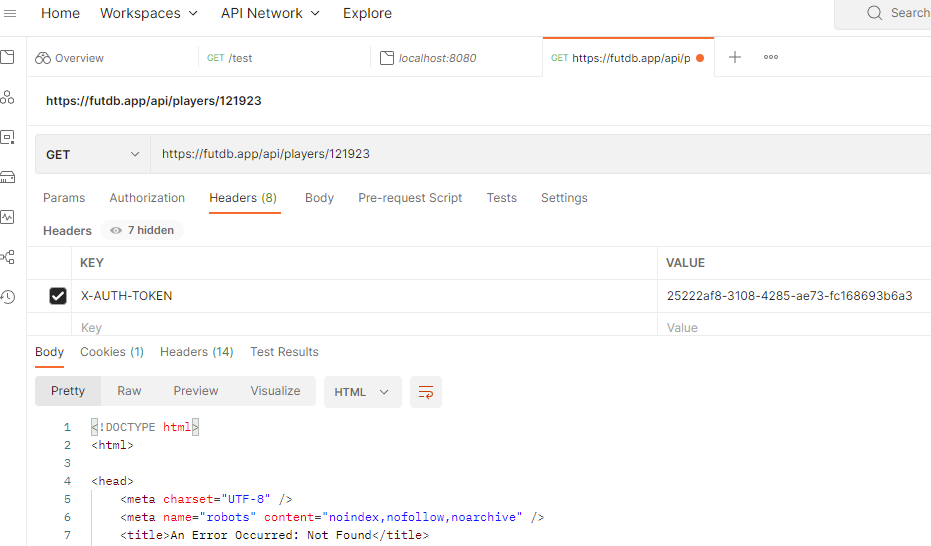

In [14]:
# show image here from the same folder as the one this file is in
Image.open("/notebooks/images/APIresponse2023-01-06 163243.png")

Next, we get the dimensions of each dataframe.

<br /><br /><br />
### The data we have been given is old, and the new FIFA Api does not recogize the idetifiers (ids). So there is no method left with us to verify or enrich against FIFA API. We have to assume that the data is sane. Plus, we drop these unuseful columns.
<br /><br /><br />

Also there is no benefit of API coulmns if we are unable to get information from there. So we drop these columns from all datasets.

Before dropping, we need to see if these API fields can act as unique identifiers. If yes, we will keep them as id identifiers or match and replace them accrodingly to have cross table references.

In [15]:
# how many unique team api ids are there?
print(df_team["team_api_id"].nunique())
# how many unique team fifa api id's are there?
print(df_team["team_fifa_api_id"].nunique())
# how many unique team_long_name are there?
print(df_team["team_long_name"].nunique())

299
285
296


In [16]:
# are there any teams that have the same team_long_name but different team_api_id?
df_team.groupby("team_long_name").agg({"team_api_id": "nunique"}).sort_values(by="team_api_id", ascending=False).head()

,team_api_id
team_long_name,
Royal Excel Mouscron,2
Widzew Łódź,2
Polonia Bytom,2
Parma,1
Partick Thistle F.C.,1


In [17]:
# print the different team_long_names for a team with the same team_api_id
df_team[df_team["team_long_name"] == "Royal Excel Mouscron"].sort_values(by="team_api_id")

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
15,16,9996,111560.0,Royal Excel Mouscron,MOU
24,2510,274581,111560.0,Royal Excel Mouscron,MOP


In [18]:
# are there any teams that have the same team_long_name but different team_fifa_api_id?
df_team.groupby("team_long_name").agg({"team_fifa_api_id": "nunique"}).sort_values(by="team_fifa_api_id", ascending=False).head()

,team_fifa_api_id
team_long_name,
1. FC Kaiserslautern,1
Korona Kielce,1
RC Deportivo de La Coruña,1
RC Celta de Vigo,1
RAEC Mons,1


### Based on the above analysis of columns of team_api_id and team_api_fifa_id, we can drop team_api_id.

Also we observe that a team has different short name and same long name, this is unacceptable.

At this moment, we just drop the team short name as it is not present in any other data-set and is not reliable even.

In [19]:
# drop the column team_api_id since it is not unique to the team
df_team.drop("team_api_id", axis=1, inplace=True)
# drop the column team_short_name since it is not unique to the team
df_team.drop("team_short_name", axis=1, inplace=True)

In [20]:
# drop the column league_id as it is not needed
df_match.drop(columns=["league_id"],inplace=True)
df_match.head()

,id,country_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [21]:
df_team.shape

(299, 3)

In [22]:
df_country.shape

(11, 2)

In [23]:
df_league.shape

(11, 3)

In [24]:
df_match.shape

(25979, 114)

In [25]:
df_player.shape

(11060, 7)

In [26]:
df_player_attr.shape

(183978, 42)

In [27]:
df_team_attr.shape

(1458, 25)

### <center>Verify that there is indeed no duplicate data is there in the dataset</center>

In [28]:
# cehck if there are any duplicate rows anywhere in the data
print(df_team.duplicated().sum())
print(df_country.duplicated().sum())
print(df_league.duplicated().sum())
print(df_match.duplicated().sum())
print(df_player.duplicated().sum())
print(df_player_attr.duplicated().sum())
print(df_team_attr.duplicated().sum())

0
0
0
0
0
0
0


Each dataset may have their own unique identifier. We can use that to verify that there is no duplicate data in the dataset by checking those identifiers later.

## <center>Player

In [29]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


A player is unique by his name and birthday. We are assuming that this set is a unique indetifier to look for data incongruence.
Let's check for data congruency.

In [30]:
df_player[df_player.duplicated(subset=['player_name','birthday'],keep=False)]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight


In [31]:
# Set the maximum column width to 100 characters
pd.set_option('display.max_colwidth', 900)

df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


Columns can be identified as follows:

- id: Instance identifier
- player_api_id: Identifier of the player in the API used
- player_name: Player's name
- player_fifa_api_id: Identifier of the player in the FIFA API
- birthday: Player's date of birth
- height: Player's height in centimeters
- weight: Player's weight in pounds

As we see in the previous description, we have many fields that perform the task of identifying the instances, so we are going to choose the most useful one to work with the dataset. In this case, we can remove the id and player_fifa_api_id fields and use the player_api_id attribute to identify the players. We will put this last attribute as the index of the dataset.

In [32]:
df_player.drop(columns=["id", "player_fifa_api_id"],inplace=True)

In [33]:
df_player.set_index('player_api_id', inplace=True)

In [34]:
df_player.head()

,player_name,birthday,height,weight
player_api_id,,,,
505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
162549,Aaron Doran,1991-05-13 00:00:00,170.18,163
30572,Aaron Galindo,1982-05-08 00:00:00,182.88,198
23780,Aaron Hughes,1979-11-08 00:00:00,182.88,154


We'll start with the birthday attribute that represents the players' date of birth. As we can see, it is indicated in year, month and day format, which is too much information to solve this problem. Therefore, we are going to modify this attribute so that it only includes the year.

In [35]:
df_player["birthday"] = pd.DatetimeIndex(df_player["birthday"]).year

If we analyze the year of birth of the players, we can conclude that this variable follows a distribution skewed to the right. Furthermore, we can conclude that the majority of players were born between 1985 and 1990.

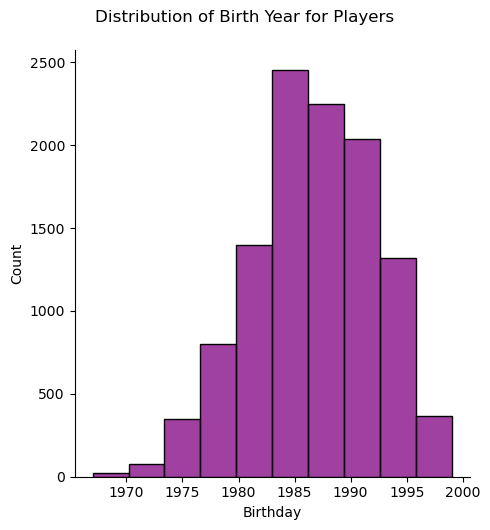

In [36]:
import seaborn as sns

# Create the plot
g = sns.displot(df_player, x="birthday", bins=10, color='purple')

# Add the title
g.fig.suptitle("Distribution of Birth Year for Players", y=1.05)

# Rename the x axis label
g.set(xlabel='Birthday')

If we analyze the weight and height data, we see the following:
- Weight: The average would be about 76Kg while the maximum and minimum would be 110Kg and 53Kg respectively.
- Height: The average would be about 181cm while the maximum and minimum would be 208cm and 157cm respectively.

In [37]:
df_player[["height","weight"]].describe()

,height,weight
count,11060.000000,11060.000000
mean,181.867445,168.380289
std,6.369201,14.990217
min,157.480000,117.000000
25%,177.800000,159.000000
50%,182.880000,168.000000
75%,185.420000,179.000000
max,208.280000,243.000000


In both cases, we can see that the variables represent a normal distribution.

Text(0.5, 1.05, 'Distribution of Player Heights')

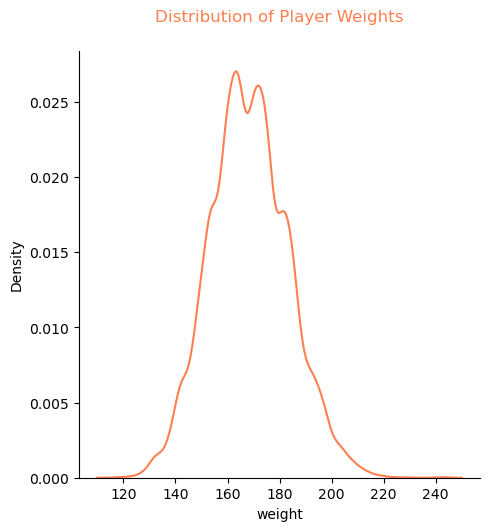

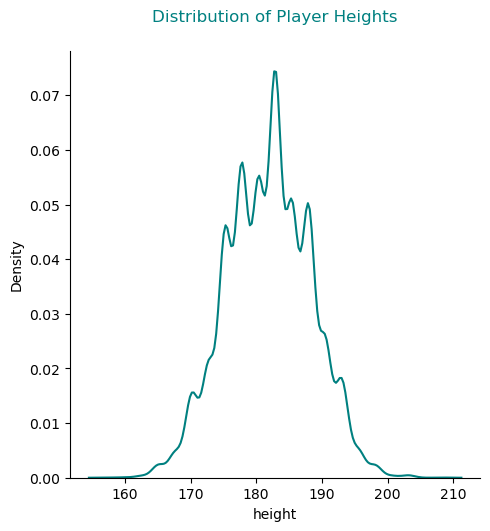

In [38]:
sns.displot(df_player, x="weight",kind="kde", color="coral")
plt.title("Distribution of Player Weights", color="coral", y=1.05)

sns.displot(df_player, x="height",kind="kde", color="teal")
plt.title("Distribution of Player Heights", color="teal", y=1.05)

We can also see a positive relationship between both variables, that is, the greater the height, the greater the weight of the soccer players.

Text(0.5, 1.0, 'Height vs. Weight of Players')

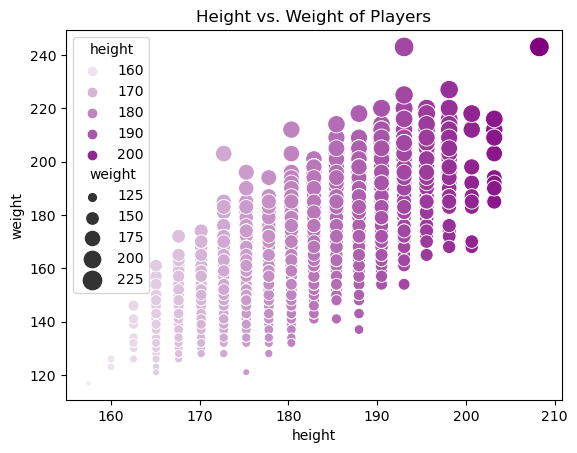

In [39]:
sns.scatterplot(data=df_player, x="height", y="weight", size="weight", sizes=(20,200), hue="height", palette=sns.light_palette("purple", as_cmap=True))
plt.title("Height vs. Weight of Players")

One way to combine these two units into a single one would be to use the Body Mass Index (BMI) metric. In the following bar chart it can be seen that the BMI of the players follows a normal distribution, with the center of the distribution being around the value 23.
Convert from pounds to kilograms by dividing it by 2.205, and convert height from inches to meters by dividing it by 100.0 and then squaring the result.

In [40]:
df_player["BMI"] = (df_player["weight"] / 2.205) / ((df_player["height"] / 100.0) ** 2)

Text(0.5, 1.05, 'Distribution of Body Mass Index (BMI) in Players')

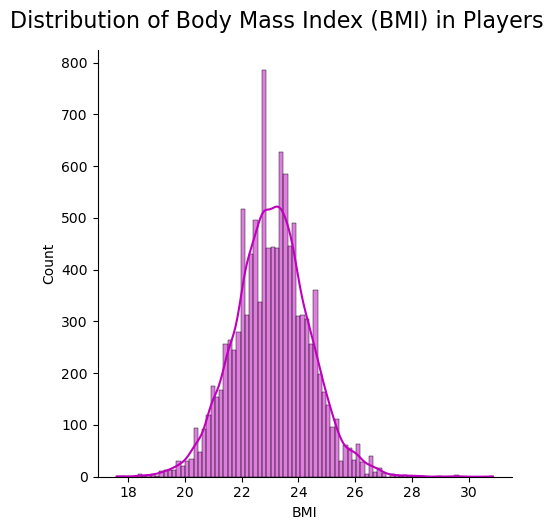

In [41]:
import matplotlib.pyplot as plt

title = "Distribution of Body Mass Index (BMI) in Players"

g = sns.displot(df_player, x="BMI", kde=True, color="m", label="BMI")

plt.suptitle(title, y=1.05, fontsize=16)

With the BMI variable generated by combining the weight and height attributes, we could do without these two attributes. Additionally, we have seen that we have two identifiers for the players: player_api_id and player_fifa_api_id so we can also remove one of them. In this case, it is preferable to keep the player_api_id attribute because it appears more frequently in other datasets.

In [42]:
df_player.drop(columns=["weight","height"],inplace=True)

## Player attributes

The following dataset contains a series of attributes for soccer players, which have been extracted from the FIFA video game. In general, an attribute is nothing more than an ability that a player possesses and whose value is in a range of 0 to 99. The average rating for these attributes is reflected in the overall_rating field. The higher the value of these attributes, the better the player's ability.

Specifically, we can classify the value of an attribute with the following quality labels:

- Excellent: 90 - 99 
- Very Good: 80 - 89 
- Good: 70 - 79 
- Fair: 50 - 69 
- Poor: 40 - 49 
- Very Poor: 0 - 39

In [43]:
df_player_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Regarding the size of the dataset, we have 183978 instances and 41 predictor variables.

In [44]:
df_player_attr.shape

(183978, 42)

In [45]:
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

Regarding the description of the attributes, we have collected the following information:

1. player_fifa_api_id: Player identifier in the FIFA video game API
2. player_api_id: Player identifier in the API used
3. date: Date of the observation
4. overall_rating: Average player skill score
5. potential: It is an estimate that indicates what the maximum overall_rating of a player will be during his professional career.
6. preferred_foot: It indicates which leg the player tends to play with and, consequently, the one on which he has greater power and control of the ball.
7. attacking_work_rate: The work rates indicate the level of involvement or participation of a player in attacking movements. These attributes can have values ​​high, medium and low.
8. defensive_work_rate: The work rates indicate the level of involvement or participation of a player in defensive movements. These attributes can have values ​​high, medium and low.
9. crossing: Determines the quality and accuracy of a player making a pass towards the center of the field, close to the opponent's goal.
10. finishing: Indicates the player's ability to score a goal.
11. heading_accuracy: Sets the player's accuracy in passing or clearing the ball using their head.
12. short_passing: Player's ability to make short passes
13. volleys: This skill demonstrates a player's ability to take shots or passes while the ball is in the air.
14. dribbling: Evaluates the ability to maintain possession of the ball against an opponent. This metric primarily measures the player's dribbling prowess.
15. curve: This attribute measures the player's ability to make passes or shots with a curved trajectory.
16. free_kick_accuracy: Accuracy or skill of the player in free kicks.
17. long_passing: Player's ability to make long passes.
18. ball_control: Level of player control over the ball.
19. acceleration: Player's ability to accelerate quickly.
20. sprint_speed: Player's ability to run at maximum speed.
21. agility: Player's ability to change direction quickly.
22. reactions: Player's response time to events that happen around him.
23. balance: Shows the player's balance level.
24. shot_power: This attribute determines the power of a player to shoot the ball with power.
25. jumping: Player's ability to jump.
26. stamina: Player's ability to maintain high levels of physical performance for long periods of time.
27. strength: Player's ability to resist physical contact. It shows what is the physical strength of a player.
28. long_shots: Player's ability to shoot from a long distance.
29. aggression: Measures the frequency of pushing, pulling and tackling members of the opposing team.
30. interceptions: Player's ability to intercept the ball. Ability to intercept the ball during passes from the opposing team.
31. positioning: Player's ability to find the best position in the field to receive the ball.
32. vision: Player's ability to see the game and make good decisions. Also, Mental ability of the player to remember the positions of his teammates.
33. penalties: Accuracy of the player to take penalties.
34. marking: Ability to defend against a play by the opposing team.
35. standing_tackle: Ability of the player to make tackles, that is, to extend the leg to move the ball away from the opponent.
36. sliding_tackle: Ability of the player to make tackles, that is, to extend the leg to move the ball away from the opponent. A standing/block tackle as its name implies is one where you remain on your feet. The other tackle is when you are off your feet, also known as the sliding tackle.
37. gk_diving: Goalkeeper's ability to dive to save shots.
38. gk_handling: Goalkeeper's ability to catch or stop the ball with his hands.
39. gk_kicking: Evaluate the length and accuracy of the goalkeeper's kicks.
40. gk_positioning: Goalkeeper's ability to position himself to save shots.
41. gk_reflexes: Goalkeeper's ability to react to save shots.

As we have done with the previous dataset, we remove the player_fifa_api_id and id attributes and keep the player_api_id attribute that will act as the dataset index.

In [46]:
df_player_attr.drop(columns = ["player_fifa_api_id", "id"],inplace=True)

First of all, we have discovered that there are instances with all their attributes with NA or null values, except for the variables player_fifa_api_id, player_api_id, date. Therefore, we are going to remove the instances that have a large percentage of missing values.

In [47]:
df_player_attr[df_player_attr["overall_rating"].isnull()].head()

,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
483,31684,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,29904,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,24159,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2089,31916,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2482,37249,2007-02-22 00:00:00,NaN,NaN,None,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_player_attr.isnull().sum()

player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle         2713
gk_diving           

In [49]:
null_instances = df_player_attr[df_player_attr["overall_rating"].isnull()].index

In [50]:
df_player_attr.drop(null_instances,inplace=True)

This dataset seems to complement the attributes of the player dataset, so we can combine it into a single dataset.

In [51]:
df_player_attr = df_player.merge(df_player_attr,on=["player_api_id"])

A peculiarity of this dataset is that it contains information on the players by dates, that is, it shows us metrics of the players on different dates since they can vary over time. These dates are indicated in day, month and year format in the date field, which we are going to modify to show only the year. 

Additionally, we have seen that there are instances of player statistics within the same year, so we are going to simplify all this information into a single annual instance. In particular, we are going to obtain the mode of the non-numeric data and the mean of the numeric data.

In [52]:
df_player_attr["date"] =  pd.DatetimeIndex(df_player_attr["date"]).year

In [53]:
def break_ties(col: str):
    most_common = pd.Series.mode(col)
    
    if len(most_common) > 1:
        return most_common[0]
    else:
        return most_common

We obtain the mode for categorical data.

In [54]:
df_player_attr_cat = df_player_attr.groupby(["player_api_id", "date"])[["preferred_foot","attacking_work_rate", "defensive_work_rate"]].agg(lambda x: break_ties(x)).reset_index()

In [55]:
df_player_attr_cat.head()

,player_api_id,date,preferred_foot,attacking_work_rate,defensive_work_rate
0,2625,2007,right,high,medium
1,2625,2008,right,high,medium
2,2625,2010,right,high,medium
3,2625,2011,right,high,medium
4,2625,2012,right,medium,medium


We get the mean for numeric data.

In [56]:
df_player_attr_num = df_player_attr.groupby(["player_api_id", "date"]).agg("mean", numeric_only=True).reset_index()

In [57]:
df_player_attr_num.head()

,player_api_id,date,birthday,BMI,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2625,2007,1981.0,22.737699,63.0,64.0,48.0,48.0,47.0,64.0,...,56.0,46.0,64.0,66.0,63.0,14.0,17.5,67.0,16.5,17.0
1,2625,2008,1981.0,22.737699,60.0,64.0,48.0,48.0,47.0,64.0,...,56.0,46.0,64.0,66.0,63.0,14.0,24.0,67.0,24.0,24.0
2,2625,2010,1981.0,22.737699,60.0,64.0,48.0,48.0,47.0,64.0,...,56.0,69.0,64.0,66.0,63.0,12.0,11.0,6.0,8.0,8.0
3,2625,2011,1981.0,22.737699,58.5,60.5,52.0,47.0,46.0,58.0,...,55.0,66.0,63.0,63.0,57.0,12.0,11.0,6.0,8.0,8.0
4,2625,2012,1981.0,22.737699,58.0,58.0,52.0,47.0,46.0,53.0,...,55.0,66.0,63.0,63.0,52.0,12.0,11.0,6.0,8.0,8.0


We create again a dataset of player attributes with the simplification done:

In [58]:
df_player_attr = df_player_attr_cat.merge(df_player_attr_num, on=["player_api_id","date"])

In [59]:
df_player_attr.head()

,player_api_id,date,preferred_foot,attacking_work_rate,defensive_work_rate,birthday,BMI,overall_rating,potential,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2625,2007,right,high,medium,1981.0,22.737699,63.0,64.0,48.0,...,56.0,46.0,64.0,66.0,63.0,14.0,17.5,67.0,16.5,17.0
1,2625,2008,right,high,medium,1981.0,22.737699,60.0,64.0,48.0,...,56.0,46.0,64.0,66.0,63.0,14.0,24.0,67.0,24.0,24.0
2,2625,2010,right,high,medium,1981.0,22.737699,60.0,64.0,48.0,...,56.0,69.0,64.0,66.0,63.0,12.0,11.0,6.0,8.0,8.0
3,2625,2011,right,high,medium,1981.0,22.737699,58.5,60.5,52.0,...,55.0,66.0,63.0,63.0,57.0,12.0,11.0,6.0,8.0,8.0
4,2625,2012,right,medium,medium,1981.0,22.737699,58.0,58.0,52.0,...,55.0,66.0,63.0,63.0,52.0,12.0,11.0,6.0,8.0,8.0


With this transformation, the dataset has gone from 183978 instances to 73059.

In [60]:
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73059 entries, 0 to 73058
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_api_id        73059 non-null  int64  
 1   date                 73059 non-null  int64  
 2   preferred_foot       73059 non-null  object 
 3   attacking_work_rate  73059 non-null  object 
 4   defensive_work_rate  73059 non-null  object 
 5   birthday             73059 non-null  float64
 6   BMI                  73059 non-null  float64
 7   overall_rating       73059 non-null  float64
 8   potential            73059 non-null  float64
 9   crossing             73059 non-null  float64
 10  finishing            73059 non-null  float64
 11  heading_accuracy     73059 non-null  float64
 12  short_passing        73059 non-null  float64
 13  volleys              71615 non-null  float64
 14  dribbling            73059 non-null  float64
 15  curve                71615 non-null 

In [61]:
df_player_attr.shape

(73059, 42)

Next, we are going to compare the overall_rating and overall_potential of the players. In this case, as is evident, the potential of the players has to be slightly higher than the current rating.

Text(0.5, 1.0, 'Comparison of Overall Rating and Potential of Players')

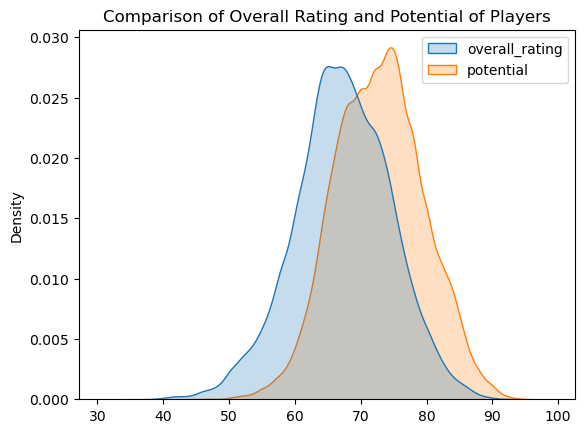

In [62]:
sns.kdeplot(data=df_player_attr[["overall_rating", "potential"]], fill=True,legend=True)
plt.title("Comparison of Overall Rating and Potential of Players")

Let's look at the relationship between Potential and Overall Rating

Text(0.5, 1.0, 'Relationship between Overall Rating and Potential')

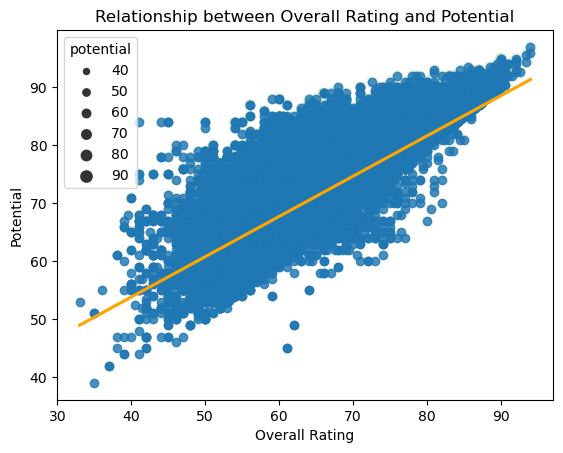

In [63]:
import seaborn as sns

sns.scatterplot(x="overall_rating", y="potential", size="potential", color='green', alpha=0.1, data=df_player_attr)
sns.regplot(x="overall_rating", y="potential", line_kws={"color": "orange"}, data=df_player_attr)
plt.xlabel("Overall Rating")
plt.ylabel("Potential")
plt.title("Relationship between Overall Rating and Potential")

We are going to calculate how many players have exceeded performance expectations.

In [64]:
underestimate_player = df_player_attr["overall_rating"] - df_player_attr["potential"]
underestimate_player = underestimate_player.astype(int)

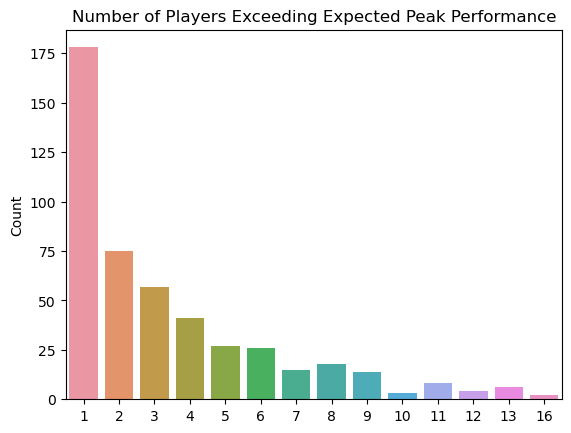

In [65]:
sns.countplot(x=underestimate_player[underestimate_player > 0])
plt.title("Number of Players Exceeding Expected Peak Performance")
plt.ylabel("Count")
plt.show()

Just over 400 players exceed their expected peak performance.

With the following figure, we will describe the predominant foot of the players. In general, we will see that 75% of the players use the right foot to play.

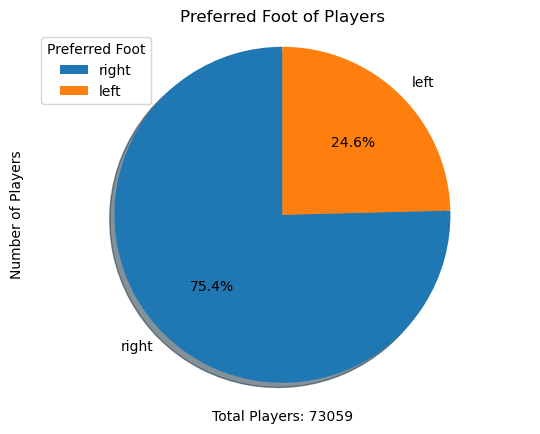

In [66]:
fig1, ax1 = plt.subplots()
ax1.pie(
    df_player_attr["preferred_foot"].value_counts(), 
    labels=df_player_attr["preferred_foot"].unique(), 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90
)
ax1.axis('equal')
total_players = df_player_attr["preferred_foot"].value_counts().sum()
plt.xlabel("Total Players: {}".format(total_players))
plt.ylabel("Number of Players")
plt.legend(df_player_attr["preferred_foot"].unique(), title="Preferred Foot")
plt.title("Preferred Foot of Players")
plt.show()

Now we will analyze the attributes of attacking_work_rate and defensive_work_rate, whose values ​​must be low, medium and high. However, this does not happen when detecting that other values ​​appear without apparent meaning. To solve this situation, we will eliminate those strange values ​​to later apply some technique for imputing missing values ​​if these attributes are finally used.

According to the results obtained, most of the players would have a medium work rate.

In [67]:
df_player_attr["defensive_work_rate"] = df_player_attr["defensive_work_rate"].astype(str)
df_player_attr["defensive_work_rate"].value_counts()

medium    51851
high       9721
low        7048
_0         1827
o          1094
ormal       249
1           196
2           147
3           139
5           117
7            98
6            94
0            84
9            79
ean          77
es           70
4            66
tocky        62
8            40
Name: defensive_work_rate, dtype: int64

We replace the strange values ​​with the value N/A.

In [68]:
df_player_attr["defensive_work_rate"].replace(inplace=True,to_replace=["_0","o","ormal","0","1","2","3","4","5","6","7","8","9","ean","es","tocky"],value=np.nan)

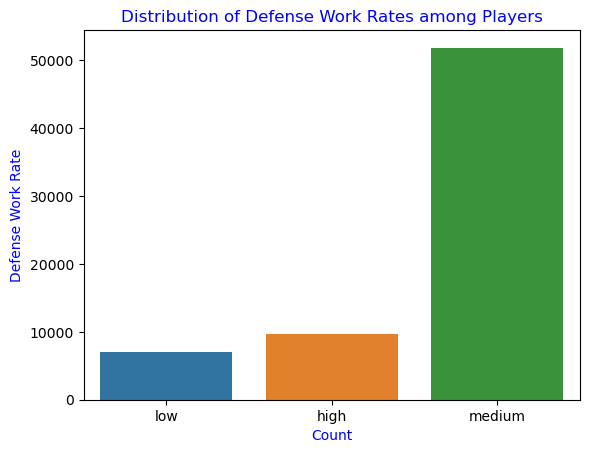

In [69]:
counts = df_player_attr["defensive_work_rate"].value_counts()
sorted_counts = counts.sort_values()
sns.countplot(x="defensive_work_rate", data=df_player_attr, order=sorted_counts.index)
plt.xlabel("Count", color="blue")
plt.ylabel("Defense Work Rate", color="blue")
plt.title("Distribution of Defense Work Rates among Players", color="blue")
plt.show()

In [70]:
df_player_attr["attacking_work_rate"] = df_player_attr["attacking_work_rate"].astype(str)
df_player_attr["attacking_work_rate"].value_counts()

medium    50394
high      14719
low        3570
None       2091
[]         1827
norm        249
le           77
y            70
stoc         62
Name: attacking_work_rate, dtype: int64

We replace the strange values ​​with the value N/A.

In [71]:
df_player_attr["attacking_work_rate"].replace(inplace=True,to_replace=["None","[]","norm","le","y","stoc"],value=np.nan)

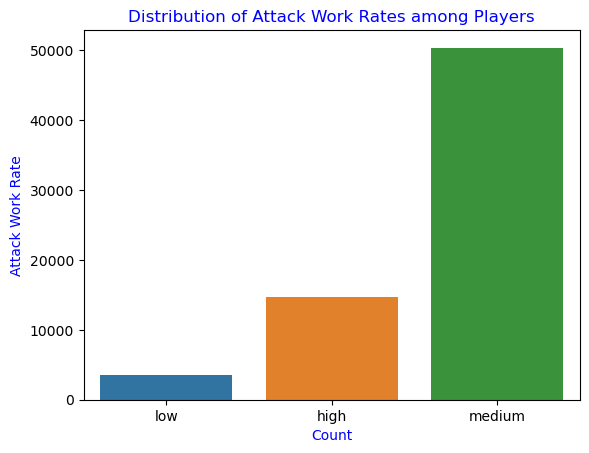

In [72]:
counts = df_player_attr["attacking_work_rate"].value_counts()
sorted_counts = counts.sort_values()
sns.countplot(x="attacking_work_rate", data=df_player_attr, order=sorted_counts.index)
plt.xlabel("Count", color="blue")
plt.ylabel("Attack Work Rate", color="blue")
plt.title("Distribution of Attack Work Rates among Players", color="blue")
plt.show()

Next, we are going to analyze the rest of the remaining characteristics by groups.

In [73]:
# Check the data type of the 'col' column
print(df_player_attr.columns.tolist())

['player_api_id', 'date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'birthday', 'BMI', 'overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']


In [74]:
draw_features1 = ['crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing']

draw_features2 = ['ball_control', 'acceleration',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength']

draw_features3 = ['long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'sliding_tackle','gk_diving']

draw_features4 = ['gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In this first group, we see that mainly all the variables describe a normal distribution, reaching its peak around a value of 60.

Of all the variables present, possibly the finishing field is the one with the most irregularities, since it has two peaks, at values ​​20 and 60 respectively. This is due to the fact that this parameter is more oriented to evaluate forwards than defenses.

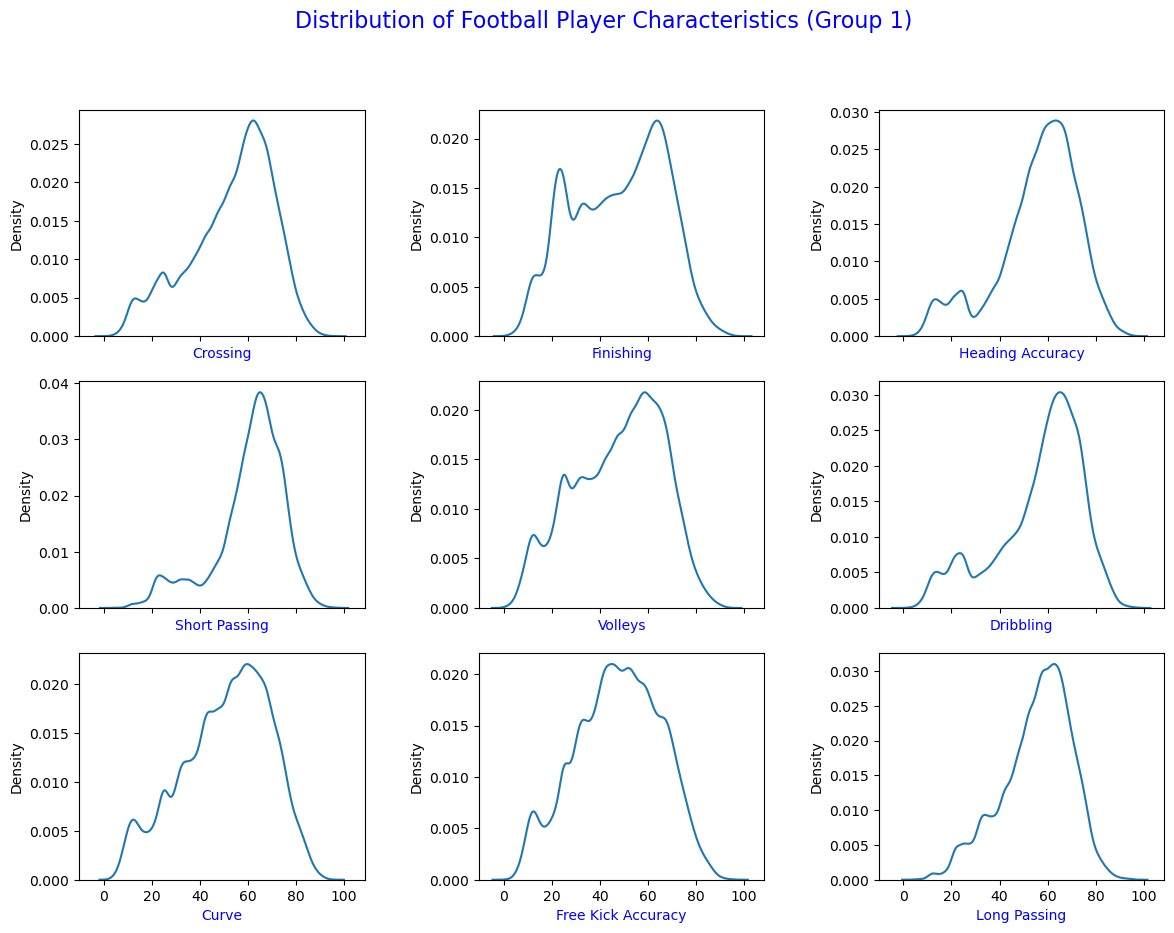

In [75]:
import string

#  Categorical Data
a = 3  # number of rows
b = 3  # number of columns

fig, axs = plt.subplots(a, b, figsize=(14,10), sharex=True, gridspec_kw={'wspace': 0.4})
fig.set_constrained_layout_pads(w_pad=0.1, h_pad=0.1)

for ax, feature in zip(axs.flat, draw_features1):
    ax.set_xlabel(string.capwords(feature.replace("_", " ")), color="blue")
    sns.kdeplot(data = df_player_attr, x=feature, ax=ax)

fig.suptitle("Distribution of Football Player Characteristics (Group 1)", fontsize=16, color="blue")
    
plt.show()

In the second group of attributes, something similar seems to happen. Most players get very positive scores between 60 and 80.

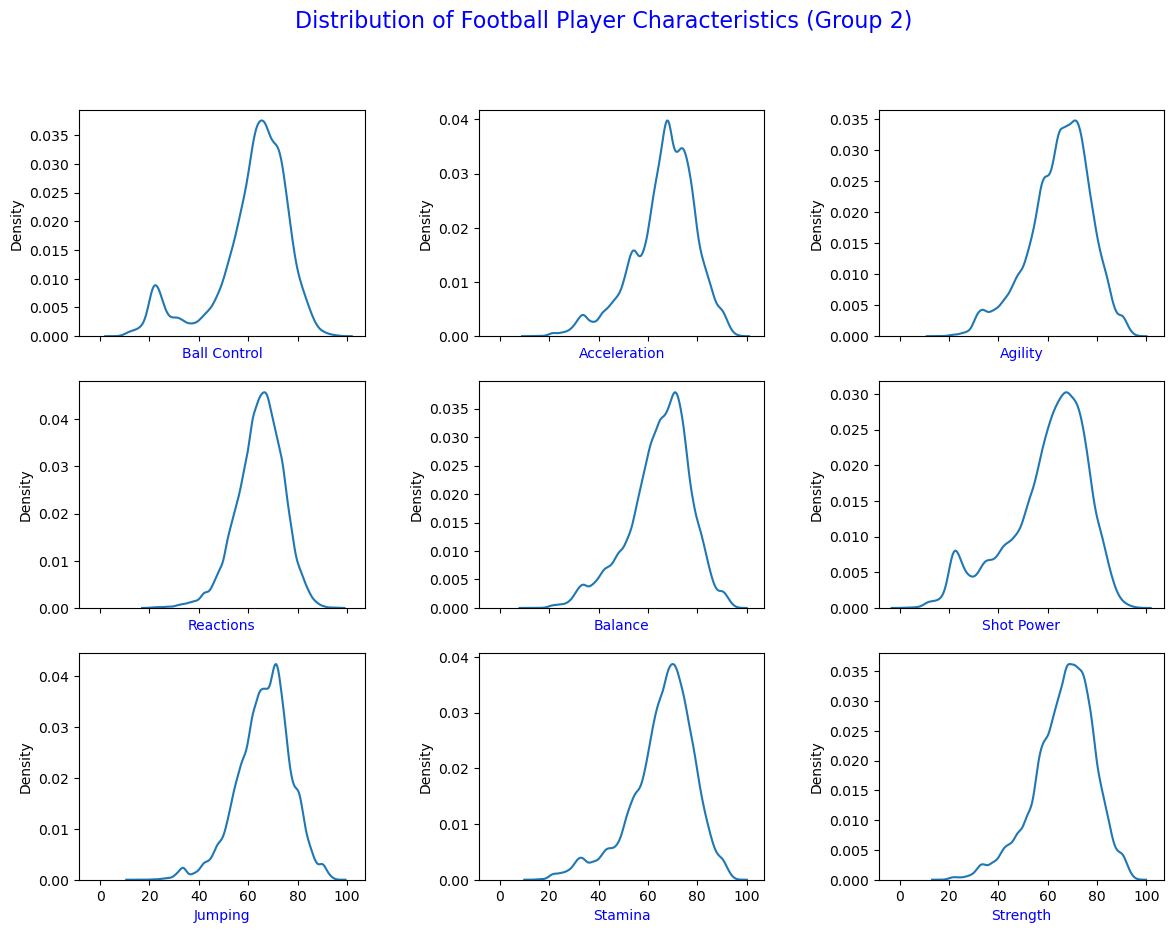

In [76]:
import string

#  Categorical Data
a = 3  # number of rows
b = 3  # number of columns

fig, axs = plt.subplots(a, b, figsize=(14,10), sharex=True, gridspec_kw={'wspace': 0.4})
fig.set_constrained_layout_pads(w_pad=0.1, h_pad=0.1)

for ax, feature in zip(axs.flat, draw_features2):
    ax.set_xlabel(string.capwords(feature.replace("_", " ")), color="blue")
    sns.kdeplot(data = df_player_attr, x=feature, ax=ax)

fig.suptitle("Distribution of Football Player Characteristics (Group 2)", fontsize=16, color="blue")
plt.show()

Similar to the previous graphs, most of the variables describe a normal distribution with a mean of 60. However, there are other attributes such as interceptions, marking, standing_tackle that present two well-defined peaks around the values ​​20 and 60. These cases usually indicate that these attributes mainly evaluate the abilities of a type of player such as forwards.

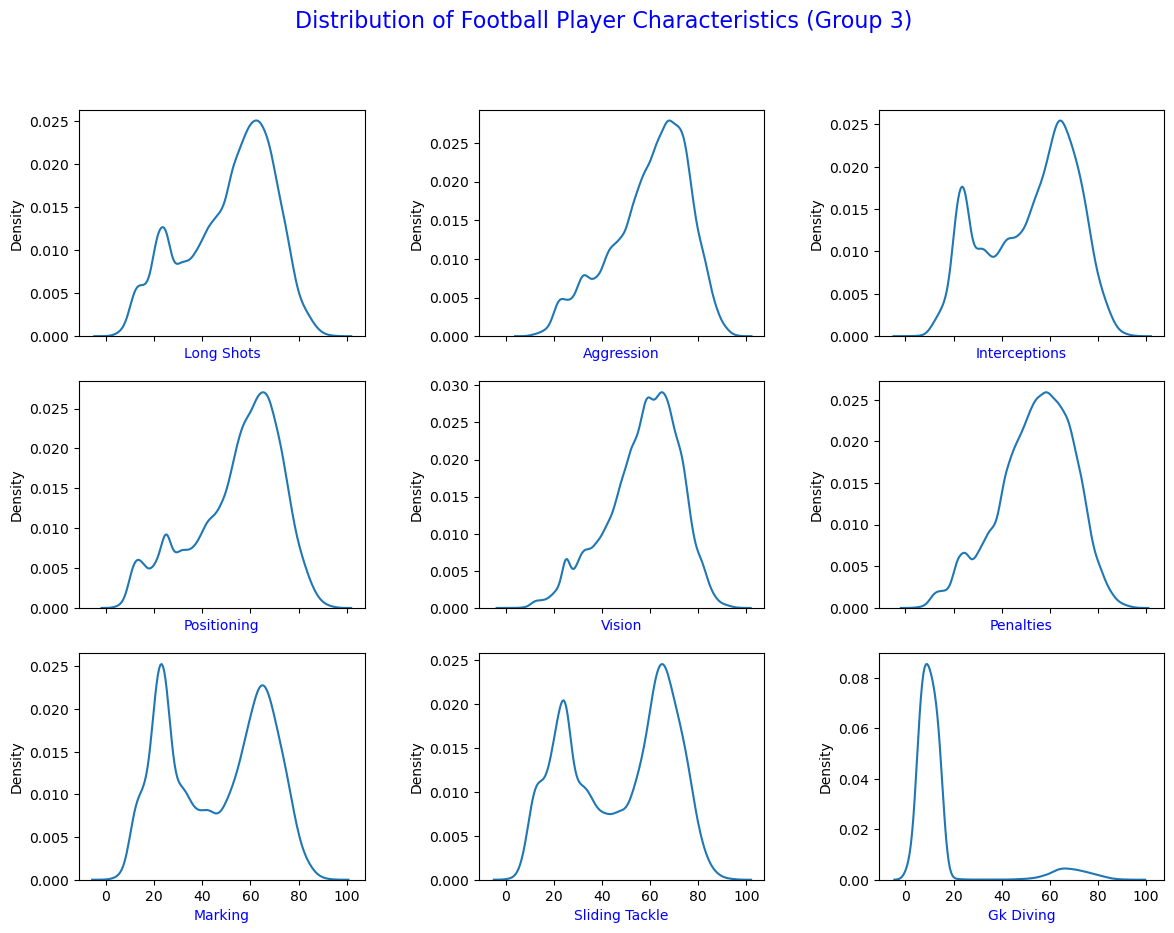

In [77]:
import string

#  Categorical Data
a = 3  # number of rows
b = 3  # number of columns

fig, axs = plt.subplots(a, b, figsize=(14,10), sharex=True, gridspec_kw={'wspace': 0.4})
fig.set_constrained_layout_pads(w_pad=0.1, h_pad=0.1)

for ax, feature in zip(axs.flat, draw_features3):
    ax.set_xlabel(string.capwords(feature.replace("_", " ")), color="blue")
    sns.kdeplot(data = df_player_attr, x=feature, ax=ax)

fig.suptitle("Distribution of Football Player Characteristics (Group 3)", fontsize=16, color="blue")
plt.show()

The last set of attributes to analyze has the form gk_xxxxx, which indicate or evaluate the performance of a player when playing the role of goalkeeper. In this case, all players have value of these attributes, whether or not they are goalkeepers. As we can see, the mean of the distribution is above the value 20. This is mainly due to the fact that the vast majority of players are not goalkeepers and have low performance as goalkeepers.

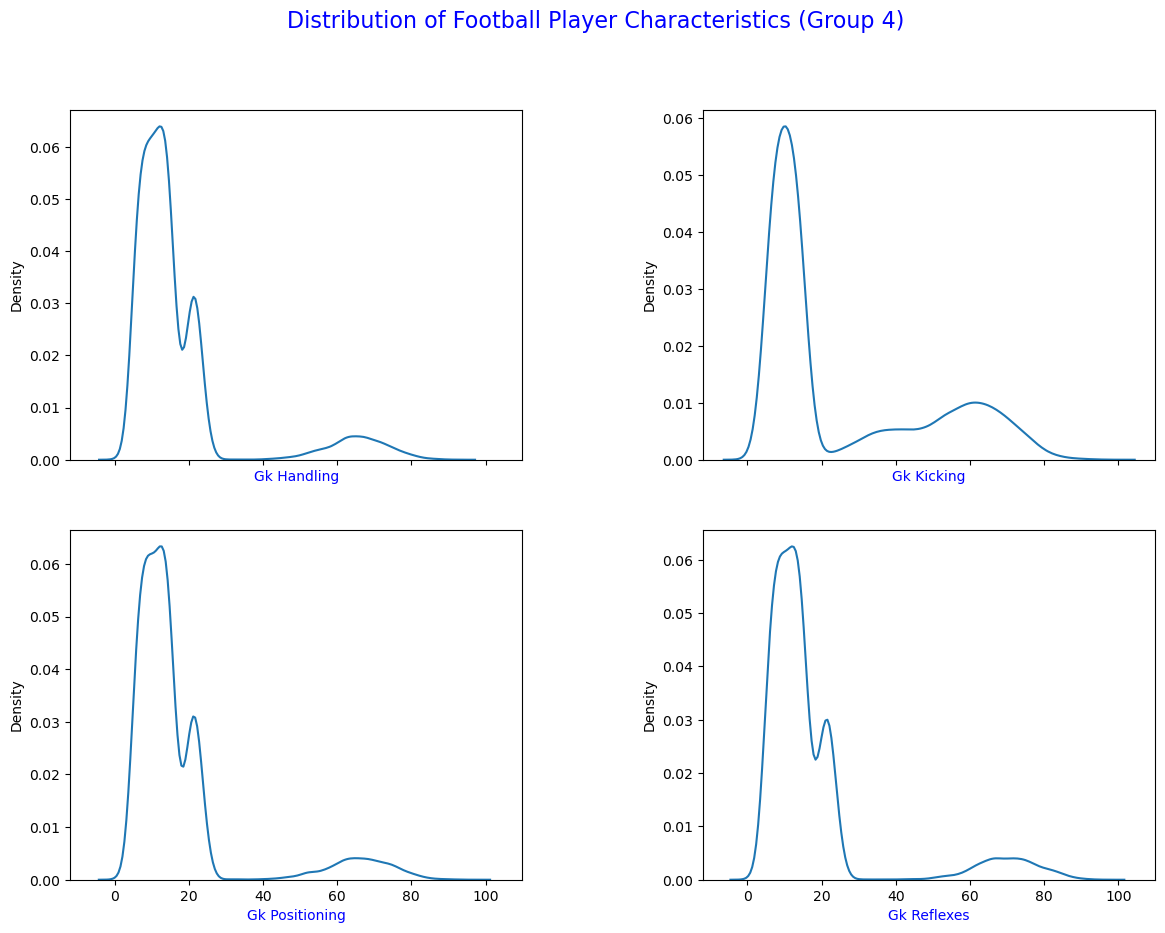

In [78]:
import string

#  Categorical Data
a = 2  # number of rows
b = 2  # number of columns

fig, axs = plt.subplots(a, b, figsize=(14,10), sharex=True, gridspec_kw={'wspace': 0.4})
fig.set_constrained_layout_pads(w_pad=0.1, h_pad=0.1)

for ax, feature in zip(axs.flat, draw_features4):
    ax.set_xlabel(string.capwords(feature.replace("_", " ")), color="blue")
    sns.kdeplot(data = df_player_attr, x=feature, ax=ax)

fig.suptitle("Distribution of Football Player Characteristics (Group 4)", fontsize=16, color="blue")
plt.show()

Next, we are going to find out if there are correlations between variables, which implies that they are redundant variables that do not provide extra information.

In [79]:
player_att_corrs = df_player_attr.corr(numeric_only=True)
player_att_corrs = player_att_corrs.mask(np.tril(np.ones(player_att_corrs.shape)).astype(bool))
player_att_corrs = player_att_corrs.stack().reset_index()

In [80]:
player_att_corrs[(player_att_corrs[0] >= 0.8) | (player_att_corrs[0] <= -0.8)].sort_values(by=0,ascending=False)

,level_0,level_1,0
736,gk_handling,gk_positioning,0.971326
740,gk_positioning,gk_reflexes,0.971071
737,gk_handling,gk_reflexes,0.970859
713,marking,standing_tackle,0.951262
720,standing_tackle,sliding_tackle,0.945991
714,marking,sliding_tackle,0.929806
734,gk_diving,gk_reflexes,0.926814
733,gk_diving,gk_positioning,0.917147
731,gk_diving,gk_handling,0.916346
488,acceleration,sprint_speed,0.903734


Based on the following table of correlations, we could remove the following variables: sprint_speed, standing_tackle, sliding_tackle, gk_reflexes", gk_diving , gk_handling since they are closely related to the rest. However, we will leave this phase when we generate the final dataset.

In [81]:
df_player_attr.drop(columns=["sprint_speed","standing_tackle", "sliding_tackle", "gk_reflexes","gk_diving","gk_handling"],inplace=True)

## Country

This data set shows all the countries of the soccer teams that are included in this database, which in this case are 11.

In [82]:
df_country = football_db["Country"]
df_country.set_index('id', inplace=True) # We assign as index the value of the id column
df_country.head()

,name
id,
1,Belgium
1729,England
4769,France
7809,Germany
10257,Italy


In [83]:
df_country.shape

(11, 1)

## League

This dataset is similar to the previous dataset but describing the leagues that exist for each country. In this particular case, there is a 1:1 relationship, that is, only information from one league per country is displayed.

In [84]:
df_league.set_index('id', inplace=True) # We assign as index the value of the id column
df_league

,country_id,name
id,,
1,1,Belgium Jupiler League
1729,1729,England Premier League
4769,4769,France Ligue 1
7809,7809,Germany 1. Bundesliga
10257,10257,Italy Serie A
13274,13274,Netherlands Eredivisie
15722,15722,Poland Ekstraklasa
17642,17642,Portugal Liga ZON Sagres
19694,19694,Scotland Premier League


Since it is a 1:1 relationship, we have decided to merge the league and country dataframes into one dataframe.

In [85]:
df_league_country = df_country.merge(df_league, left_index=True, right_index=True)

In [86]:
df_league_country.head()

,name_x,country_id,name_y
id,,,
1,Belgium,1,Belgium Jupiler League
1729,England,1729,England Premier League
4769,France,4769,France Ligue 1
7809,Germany,7809,Germany 1. Bundesliga
10257,Italy,10257,Italy Serie A


In [87]:
df_league_country.drop(['country_id'], axis=1, inplace=True)

We assign names to the columns

In [88]:
df_league_country.columns = ["Country", "League"]

In [89]:
df_league_country

,Country,League
id,,
1,Belgium,Belgium Jupiler League
1729,England,England Premier League
4769,France,France Ligue 1
7809,Germany,Germany 1. Bundesliga
10257,Italy,Italy Serie A
13274,Netherlands,Netherlands Eredivisie
15722,Poland,Poland Ekstraklasa
17642,Portugal,Portugal Liga ZON Sagres
19694,Scotland,Scotland Premier League


## Match

The next data frame to be analyzed contains information / statistics about the football matches that have been played.

In [90]:
df_match.head()

,id,country_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [91]:
df_match[["id","season","country_id","stage"]].groupby(by=["season","country_id"]).count().describe()

,id,stage
count,88.000000,88.000000
mean,295.215909,295.215909
std,77.388028,77.388028
min,12.000000,12.000000
25%,240.000000,240.000000
50%,306.000000,306.000000
75%,380.000000,380.000000
max,380.000000,380.000000


We get the size of the dataset: 25979 instances and 111 attributes.

In [92]:
df_match.shape

(25979, 114)

First, let's remove those useless attributes like the id field and set the match_api_id attribute as an index.

In [93]:
df_match.drop(columns=["id"], inplace=True)

In [94]:
df_match.set_index('match_api_id', inplace=True) # We assign as index the value of the id column

Next, we will analyze the number of missing values.

In [95]:
df_match.isnull().sum() * 100 / len(df_match)

country_id           0.000000
season               0.000000
stage                0.000000
date                 0.000000
home_team_api_id     0.000000
                      ...    
GBD                 45.486739
GBA                 45.486739
BSH                 45.490589
BSD                 45.490589
BSA                 45.490589
Length: 112, dtype: float64

With these missing values ​​data, we could eliminate the **PSH**, **PSD** and **PSA** variables because they have a very high percentage of missing values ​​(greater than 50%).

In [96]:
df_match.drop(columns=["PSH","PSD","PSA"],inplace=True)

We have observed that there are about 1800 instances that have all the **away_player_n**, **home_player_n**, **away_player_Xn**, and **home_player_Yn** attributes missing. Consequently, we are going to remove these instances because the absence of these attributes represents 66% of the instance and it would be very complex to try to impute those values.

In [97]:
for attribute in ["home_player_X", "away_player_X", "home_player_", "away_player_", "home_player_Y", "away_player_Y"]:
    for number in range(1,2):
        variable = str(attribute) + "" + str(number)
        null_match_instances = df_match[df_match[variable].isnull()].index
        df_match.drop(null_match_instances,inplace=True)
        df_match[variable] = df_match[variable].astype(int)

In [98]:
df_match.isnull().sum()

country_id              0
season                  0
stage                   0
date                    0
home_team_api_id        0
                    ...  
GBD                 10437
GBA                 10437
BSH                 10437
BSD                 10437
BSA                 10437
Length: 109, dtype: int64

In [99]:
df_match.shape

(23895, 109)

We additionally analyze the number of seasons and obtain that currently data is shown from 2008 to 2015. An interesting fact is that we have more data the more recent it is.

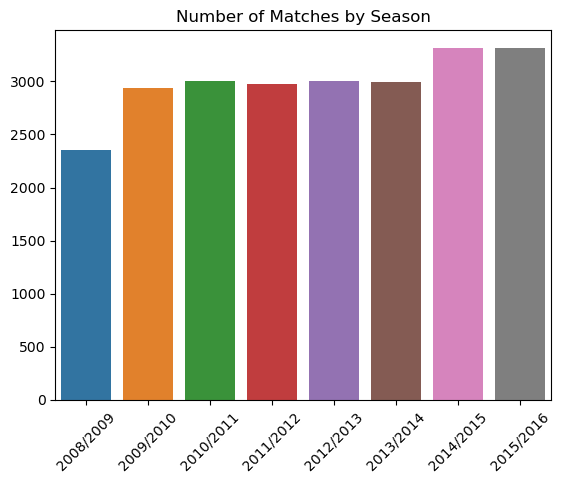

In [100]:
import pandas as pd
import seaborn as sns

sns.barplot(x=df_match["season"].value_counts().sort_index().index, y=df_match["season"].value_counts().sort_index().values)

plt.xticks(rotation=45)
plt.title("Number of Matches by Season")

plt.show()

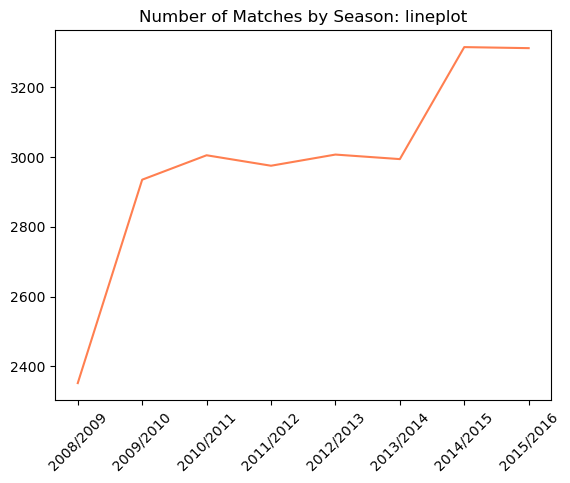

In [101]:
sns.lineplot(x=df_match["season"].value_counts().sort_index().index, y=df_match["season"].value_counts().sort_index().values, color="coral")

plt.xticks(rotation=45)
plt.title("Number of Matches by Season: lineplot")

plt.show()

Regarding the **season** attribute, we are going to extract only the first year to make it easier when making relationships with variables from other datasets.

In [102]:
df_match["season"]=  df_match["season"].apply(lambda x: x[:4])

Another relevant data is the proportion of parties that belong to each league. In this way, according to the extracted data, we see that the games played by the English, Italian, French and Spanish leagues predominate in the dataset.

In [103]:
df_match.head()

,country_id,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
match_api_id,,,,,,,,,,,,,,,,,,,,,
493016,1,2008,24,2009-02-28 00:00:00,9996,8635,1,1,1,2.0,...,1.62,5.00,3.40,1.60,5.25,3.60,1.60,5.50,3.60,1.53
493017,1,2008,24,2009-02-27 00:00:00,8203,9987,2,1,1,2.0,...,2.30,2.65,3.25,2.35,2.90,3.25,2.30,2.80,3.20,2.25
493018,1,2008,24,2009-02-28 00:00:00,9986,9998,3,0,1,2.0,...,4.10,1.90,3.25,3.75,1.83,3.25,4.25,1.91,3.25,3.60
493020,1,2008,24,2009-03-01 00:00:00,9994,9991,0,1,1,2.0,...,2.50,2.80,3.25,2.30,2.65,3.20,2.50,2.62,3.20,2.38
493021,1,2008,24,2009-02-28 00:00:00,8342,9999,2,1,1,2.0,...,10.00,1.25,5.00,9.50,1.27,5.00,10.00,1.25,5.00,9.00


In [104]:
# how many unique countries are there?
print(df_match["country_id"].nunique())

# print a list of all the column names
print(list(df_match.columns))

# print the names of all the columns that exactly 11 unique values
print(list(df_match.columns[df_match.nunique() == 11]))

11
['country_id', 'season', 'stage', 'date', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_playe

In [105]:
# print head of the columns  'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11'
print(df_match[['country_id', 'home_team_api_id', 'away_team_api_id', 'home_player_X1', 'home_player_X2', 'goal', 'shoton']].head())

              country_id  home_team_api_id  away_team_api_id  home_player_X1  \
match_api_id                                                                   
493016                 1              9996              8635               1   
493017                 1              8203              9987               1   
493018                 1              9986              9998               1   
493020                 1              9994              9991               1   
493021                 1              8342              9999               1   

              home_player_X2  goal shoton  
match_api_id                               
493016                   2.0  None   None  
493017                   2.0  None   None  
493018                   2.0  None   None  
493020                   2.0  None   None  
493021                   2.0  None   None  


In [106]:
df_match.shape

(23895, 109)

In [107]:
df_league_country.head()

,Country,League
id,,
1,Belgium,Belgium Jupiler League
1729,England,England Premier League
4769,France,France Ligue 1
7809,Germany,Germany 1. Bundesliga
10257,Italy,Italy Serie A


In [108]:
matches_by_country = df_match.merge(df_league_country, left_on="country_id", right_index=True)

In [109]:
matches_by_country.shape

(23895, 111)

In [110]:
matches_by_country.describe()

,country_id,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,23895.000000,23895.000000,23895.000000,23895.000000,23895.000000,23895.000000,23895.000000,23895.000000,23895.000000,23895.000000,...,16374.000000,21838.000000,21838.000000,21838.000000,13458.000000,13458.000000,13458.000000,13458.000000,13458.000000,13458.000000
mean,11508.693534,18.548483,10174.722327,10185.284997,1.551873,1.170789,1.000042,2.074827,4.061184,6.049466,...,4.626793,2.677121,3.908837,4.858098,2.505765,3.652297,4.358399,2.505616,3.665525,4.412748
std,7646.494973,10.488499,14589.462592,14616.994872,1.302165,1.145701,0.006469,0.384267,0.386132,0.446967,...,3.657199,1.939374,1.260587,4.356664,1.505114,0.876215,3.029397,1.523669,0.876572,3.210983
min,1.000000,1.000000,1601.000000,1601.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,4769.000000,10.000000,8528.000000,8528.000000,1.000000,0.000000,1.000000,2.000000,4.000000,6.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.550000,1.670000,3.250000,2.500000
50%,10257.000000,19.000000,9747.000000,9747.000000,1.000000,1.000000,1.000000,2.000000,4.000000,6.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19694.000000,27.000000,9925.000000,9925.000000,2.000000,2.000000,1.000000,2.000000,4.000000,6.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,24558.000000,38.000000,274581.000000,274581.000000,10.000000,9.000000,2.000000,8.000000,8.000000,8.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [111]:
matches_by_country.head()

,country_id,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,Country,League
match_api_id,,,,,,,,,,,,,,,,,,,,,
493016,1,2008,24,2009-02-28 00:00:00,9996,8635,1,1,1,2.0,...,3.40,1.60,5.25,3.60,1.60,5.50,3.60,1.53,Belgium,Belgium Jupiler League
493017,1,2008,24,2009-02-27 00:00:00,8203,9987,2,1,1,2.0,...,3.25,2.35,2.90,3.25,2.30,2.80,3.20,2.25,Belgium,Belgium Jupiler League
493018,1,2008,24,2009-02-28 00:00:00,9986,9998,3,0,1,2.0,...,3.25,3.75,1.83,3.25,4.25,1.91,3.25,3.60,Belgium,Belgium Jupiler League
493020,1,2008,24,2009-03-01 00:00:00,9994,9991,0,1,1,2.0,...,3.25,2.30,2.65,3.20,2.50,2.62,3.20,2.38,Belgium,Belgium Jupiler League
493021,1,2008,24,2009-02-28 00:00:00,8342,9999,2,1,1,2.0,...,5.00,9.50,1.27,5.00,10.00,1.25,5.00,9.00,Belgium,Belgium Jupiler League


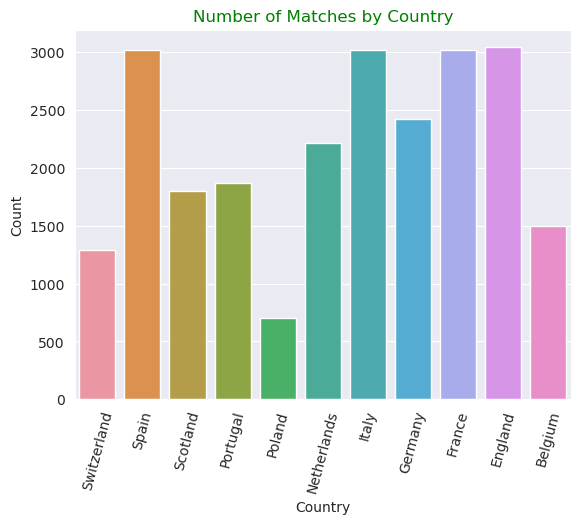

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sort the dataframe by the "Country" column in descending order by count
matches_by_country_sorted = matches_by_country.sort_values(by="Country", ascending=False)

# Make the bar plot
sns.set_style("darkgrid")
plot = sns.countplot(x="Country", data=matches_by_country_sorted)

# Rotate the plot by 90 degrees
plt.xticks(rotation=75)

# Set the y-axis label to "Count"
plot.set_ylabel("Count")

# Add the title to the plot
plot.set_title("Number of Matches by Country", color='green', y=1)

# Make the plot interactive
plt.show()

## Which leagues are in which countries?

In [113]:
league_and_country = pd.merge(df_league, df_country, on='id')
league_and_country.rename(columns={'name_x': 'League', 'name_y': 'Country'}, inplace=True)
league_and_country.drop(columns=['country_id'], inplace=True)
league_and_country

,League,Country
id,,
1,Belgium Jupiler League,Belgium
1729,England Premier League,England
4769,France Ligue 1,France
7809,Germany 1. Bundesliga,Germany
10257,Italy Serie A,Italy
13274,Netherlands Eredivisie,Netherlands
15722,Poland Ekstraklasa,Poland
17642,Portugal Liga ZON Sagres,Portugal
19694,Scotland Premier League,Scotland


## Which leagues score the most/fewest goals?

In [114]:
league_goals = matches_by_country[['League', 'home_team_goal', 'away_team_goal']]
league_goals.head()

,League,home_team_goal,away_team_goal
match_api_id,,,
493016,Belgium Jupiler League,1,1
493017,Belgium Jupiler League,2,1
493018,Belgium Jupiler League,3,0
493020,Belgium Jupiler League,0,1
493021,Belgium Jupiler League,2,1


In [115]:
league_goals = league_goals.assign(total_goals_in_match = league_goals['home_team_goal'] + league_goals['away_team_goal'])

In [116]:
league_goals.head()

,League,home_team_goal,away_team_goal,total_goals_in_match
match_api_id,,,,
493016,Belgium Jupiler League,1,1,2
493017,Belgium Jupiler League,2,1,3
493018,Belgium Jupiler League,3,0,3
493020,Belgium Jupiler League,0,1,1
493021,Belgium Jupiler League,2,1,3


In [117]:
league_goals = league_goals.drop(['home_team_goal', 'away_team_goal'], axis=1)
league_goals.head()

,League,total_goals_in_match
match_api_id,,
493016,Belgium Jupiler League,2
493017,Belgium Jupiler League,3
493018,Belgium Jupiler League,3
493020,Belgium Jupiler League,1
493021,Belgium Jupiler League,3


In [118]:
league_totals = league_goals.groupby('League')['total_goals_in_match'].sum()
league_totals

League
Belgium Jupiler League      4187
England Premier League      8240
France Ligue 1              7378
Germany 1. Bundesliga       7027
Italy Serie A               7895
Netherlands Eredivisie      6877
Poland Ekstraklasa          1844
Portugal Liga ZON Sagres    4761
Scotland Premier League     4718
Spain LIGA BBVA             8341
Switzerland Super League    3790
Name: total_goals_in_match, dtype: int64

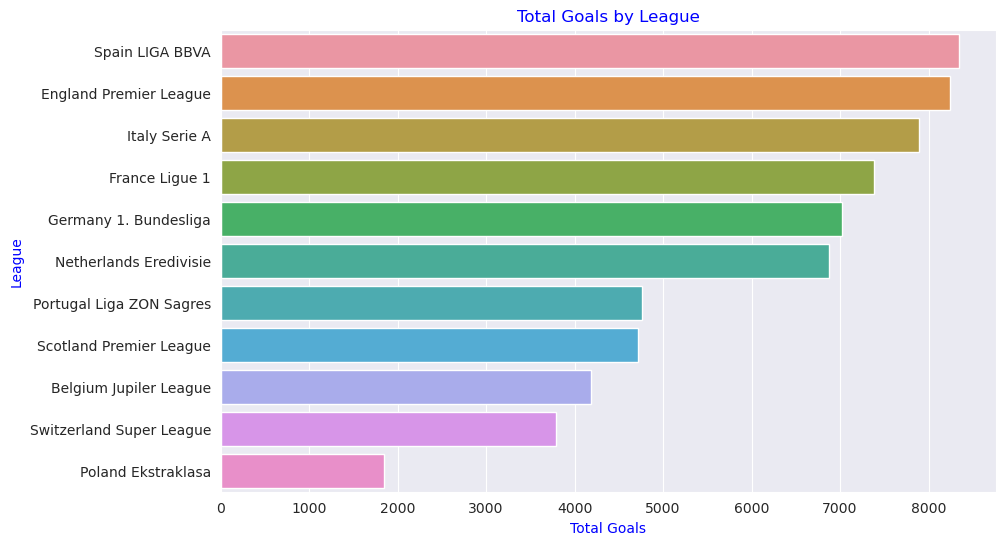

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to "darkgrid"
sns.set_style("darkgrid")

# Sort the league_totals Series in descending order
league_totals_sorted = league_totals.sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the horizontal bar plot
sns.barplot(x=league_totals_sorted.values, y=league_totals_sorted.index, orient='h')

# Add a title and axis labels
plt.title('Total Goals by League')
plt.ylabel('League')
plt.xlabel('Total Goals')

# Add the flag images and total count numbers to the plot
for i, league in enumerate(league_totals_sorted.index):
    first_word = league.lower().split()[0]
    image_path = "./flags/{}.png".format(first_word)
    image = plt.imread(image_path)
    plt.figimage(image, xo=league_totals_sorted.values[i]+20, yo=i*10, alpha=0.5, zorder=3)

plt.title('Total Goals by League', color='blue', y=1)
plt.ylabel('League', color='blue')
plt.xlabel('Total Goals', color='blue')

# Show the plot
plt.show()

#### Which leagues score the most/fewest goals?

- Spain LIGA BBVA scored the highest number of goals, that is 8341 goals.
- Poland Ekstraklasa scored the lowest number of goals, that is 1844 goals.

### Who are the top scorers in each team and league?

To answer this question, we need to figure out how and where can we merge the player table so that identifier of player can be revealed. We do this by automated search.

In [120]:
# drop the columns that are not needed for the next steps
df_match_light = df_match.drop(['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'], axis=1)

In [121]:
df_match_light.head()

,country_id,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal
match_api_id,,,,,,,,,
493016,1,2008,24,2009-02-28 00:00:00,9996,8635,1,1,None
493017,1,2008,24,2009-02-27 00:00:00,8203,9987,2,1,None
493018,1,2008,24,2009-02-28 00:00:00,9986,9998,3,0,None
493020,1,2008,24,2009-03-01 00:00:00,9994,9991,0,1,None
493021,1,2008,24,2009-02-28 00:00:00,8342,9999,2,1,None


In [122]:
# select the rows where goal is not None
df_filtered = df_match_light[df_match_light['goal'].notnull()]

# print the first five values from the goal column
print(df_filtered['goal'].head(5))

match_api_id
489042                                                                                                                                                                                                                            <goal><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>406</event_incident_typefk><elapsed>22</elapsed><player2>38807</player2><subtype>header</subtype><player1>37799</player1><sortorder>5</sortorder><team>10261</team><id>378998</id><n>295</n><type>goal</type><goal_type>n</goal_type></value><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>393</event_incident_typefk><elapsed>24</elapsed><player2>24154</player2><subtype>shot</subtype><player1>24148</player1><sortorder>4</sortorder><team>10260</team><id>379019</id><n>298</n><type>goal</type><goal_type>n</goal_type></value></goal>
489043                                                                       

## This seems to be xml data. We extract it on a leg and a prayer, as xml is very strict format.

In [123]:
# select the rows where goal is not None
df_match_light = df_match_light[pd.notnull(df_match_light['goal'])]

In [124]:
import lxml.etree as ET

def extract_xml(row,col_name,xml_key,away_home):
    count = 0
    
    element = row[col_name]
    team_id = row[away_home + "_team_api_id"]
    
    if type(element) == int:
        return element
    
    elif element != None:
       # print(row,element)
        tree = ElementTree(fromstring(element))
        root = tree.getroot()
        
        for child in root.iter(xml_key):
            
            if str(team_id) == child.text:
                count +=1
        return count
    else:
        return np.nan

### Shots taken on goal by Home-team vs Away Team

The **shoton** attribute contains information in xml format about the shots on goal taken in the match: shot time, player involved and beneficiary team.

In [125]:
df_match["shoton_away"] = df_match.apply(lambda x : extract_xml(x,"shoton","team","away"), axis = 1)
df_match["shoton_home"] = df_match.apply(lambda x : extract_xml(x,"shoton","team","home"), axis = 1)

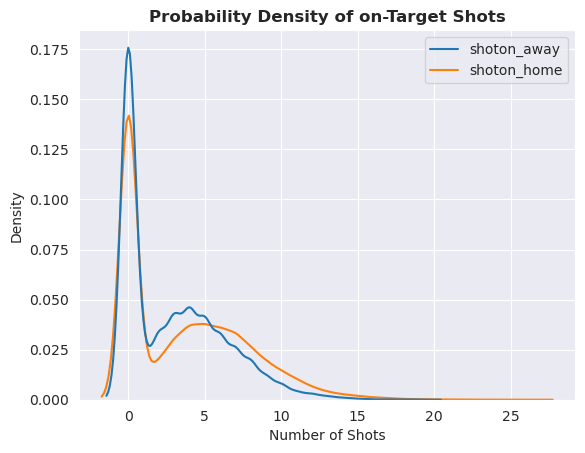

In [126]:
import matplotlib.pyplot as plt

sns.kdeplot(data=df_match[["shoton_away", "shoton_home"]], fill=False,legend=True)
plt.title("Probability Density of on-Target Shots", fontweight='bold')
plt.xlabel("Number of Shots")
plt.show()

In [127]:
df_match['homewin'] = df_match.apply(lambda x: 1 if x['home_team_goal'] > x['away_team_goal'] else 0 if x['home_team_goal'] == x['away_team_goal'] else -1, axis=1)

From the graph below: it seems that home teams tend to take more shots on goal than visiting teams.

The **shotoff** attribute contains information in xml format about the off-target shots taken in the match: time of the shot, player involved and beneficiary team.

In [128]:
df_match["shotoff_away"] = np.nan
df_match["shotoff_home"] = np.nan

In [129]:
df_match["shotoff_away"] = df_match.apply(lambda x : extract_xml(x,"shotoff","team","away"), axis = 1)
df_match["shotoff_home"] = df_match.apply(lambda x : extract_xml(x,"shotoff","team","home"), axis = 1)

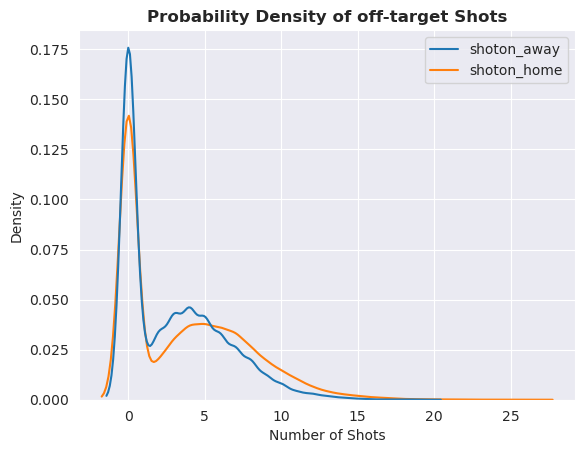

In [130]:
sns.kdeplot(data=df_match[["shoton_away", "shoton_home"]], fill=False,legend=True)
plt.title("Probability Density of off-target Shots", fontweight='bold')
plt.xlabel("Number of Shots")
plt.show()

In [131]:
shoton_away_total = df_match["shoton_away"].sum()
shoton_home_total = df_match["shoton_home"].sum()
print("Total number of shots on-target by away team:", shoton_away_total)
print("Total number of shots on-target by home team:", shoton_home_total)

Total number of shots on-target by away team: 41358.0
Total number of shots on-target by home team: 52134.0


As in the previous view, off-target shots tend to be more frequent in local teams. This could mean that these teams have more opportunities to take shots towards the opponent's goal, even if they are not ultimately considered a goal.

The **foulcommit** attribute contains information in xml format about the fouls committed in the match: minute of the foul, player involved and beneficiary team.

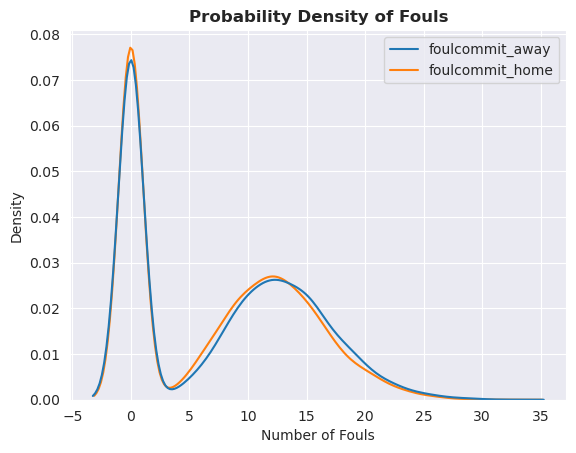

In [132]:
df_match["foulcommit_home"] = np.nan
df_match["foulcommit_away"] = np.nan
df_match["foulcommit_away"] = df_match.apply(lambda x : extract_xml(x,"foulcommit","team","away"), axis = 1)
df_match["foulcommit_home"] = df_match.apply(lambda x : extract_xml(x,"foulcommit","team","home"), axis = 1)
sns.kdeplot(data=df_match[["foulcommit_away", "foulcommit_home"]], fill=False,legend=True)
plt.title("Probability Density of Fouls", fontweight='bold')
plt.xlabel("Number of Fouls")
plt.show()

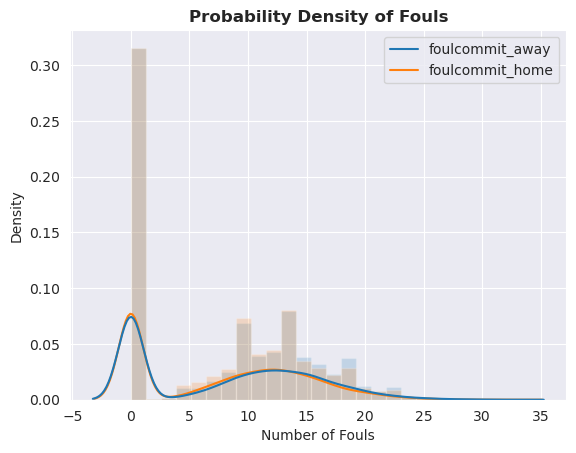

In [133]:
plt.hist(df_match["foulcommit_away"], bins=25, density=True, alpha=0.2)
plt.hist(df_match["foulcommit_home"], bins=25, density=True, alpha=0.2)
sns.kdeplot(data=df_match[["foulcommit_away", "foulcommit_home"]], fill=False, legend=True)
plt.title("Probability Density of Fouls", fontweight='bold')
plt.xlabel("Number of Fouls")
plt.show()

In [134]:
foulcommit_away_total = df_match["foulcommit_away"].sum()
foulcommit_home_total = df_match["foulcommit_home"].sum()
print("Total number of fouls committed by away team:", foulcommit_away_total)
print("Total number of fouls committed by home team:", foulcommit_home_total)

Total number of fouls committed by away team: 111495.0
Total number of fouls committed by home team: 106763.0


Regarding the fouls committed, we see that both teams present a practically identical trend.

The **card** attribute contains information in xml format about the cards that have been assigned during the match: minute of the card, player involved and affected team.

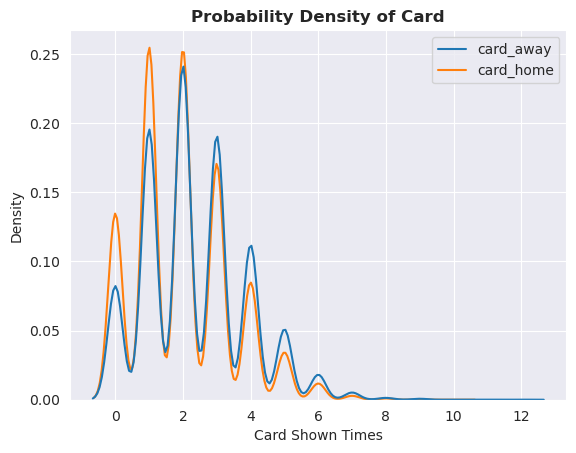

In [135]:
df_match["card_home"] = np.nan
df_match["card_away"] = np.nan
df_match["card_home"] = df_match.apply(lambda x : extract_xml(x,"card","team","home"), axis = 1)
df_match["card_away"] = df_match.apply(lambda x : extract_xml(x,"card","team","away"), axis = 1)
sns.kdeplot(data=df_match[["card_away", "card_home"]], fill=False,legend=True)
plt.title("Probability Density of Card", fontweight='bold')
plt.xlabel("Card Shown Times")
plt.show()

Regarding the number of cards, we could conclude that the local teams are sanctioned slightly less than the visiting teams. We also see that for the most part the number of cards distributed per game tends to range between 0 and 2.

The **cross** attribute contains information in xml format about the passes made in the match: minute of the pass, player involved and team.

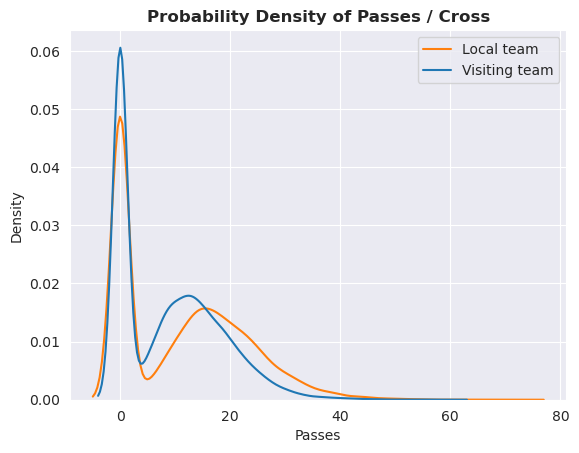

Total number of passes / cross by away team: 124574.0
Total number of passes / cross by home team: 159357.0


In [136]:
df_match["cross_home"] = np.nan
df_match["cross_away"] = np.nan
df_match["cross_home"] = df_match.apply(lambda x : extract_xml(x,"cross","team","home"), axis = 1)
df_match["cross_away"] = df_match.apply(lambda x : extract_xml(x,"cross","team","away"), axis = 1)
sns.kdeplot(data=df_match[["cross_away", "cross_home"]], fill=False,legend=True)
plt.title("Probability Density of Passes / Cross", fontweight='bold')
plt.legend(labels=["Local team","Visiting team"])
plt.xlabel("Passes")
plt.show()
cross_away_total = df_match["cross_away"].sum()
cross_home_total = df_match["cross_home"].sum()
print("Total number of passes / cross by away team:", cross_away_total)
print("Total number of passes / cross by home team:", cross_home_total)

In the case of passes, we see that local teams usually make more passes, standing around 20.

The **possession** attribute contains information in xml format about possession in the match.

In [137]:
def extract_possession_xml(row,col_name,xml_key):
    count = 0
    sum_pos = 0
    
    element = row[col_name]
    
    if type(element) == int:
        return element
    
    elif element != None:
       # print(row,element)
        tree = ElementTree(fromstring(element))
        root = tree.getroot()
        
        for child in root.iter(xml_key):
            count+=1
            sum_pos += int(child.text)
        
        if count == 0:
            return np.nan
        else:
            return sum_pos/count
    else:
        return np.nan

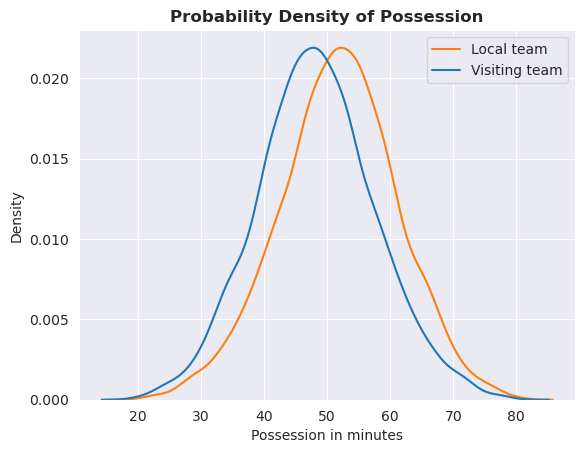

Total minutes of possession by away team: 404844.0407761829
Total minutes of possession by home team: 435055.9592238171


In [138]:
df_match["possession_home"] = np.nan
df_match["possession_away"] = np.nan
df_match["possession_home"] = df_match.apply(lambda x : extract_possession_xml(x,"possession","homepos"), axis = 1)
df_match["possession_away"] = df_match.apply(lambda x : extract_possession_xml(x,"possession","awaypos"), axis = 1)

sns.kdeplot(data=df_match[["possession_away", "possession_home"]], fill=False,legend=True)
plt.title("Probability Density of Possession", fontweight='bold')
plt.xlabel("Possession in minutes")
plt.legend(labels=["Local team","Visiting team"])
plt.show()

print("Total minutes of possession by away team:", df_match["possession_away"].sum())
print("Total minutes of possession by home team:", df_match["possession_home"].sum())

In the case of possession, it seems that both opponents are on average around 50%, although there is a certain tendency for local teams to have a higher percentage of possession.

### Analyze the betting odds of winning and losing by various betting groups.

The next columns to analyze would be the following, which represent the **odds** given by each bookmaker.
- B365X = Bet365 odds
- BWX = Bet&Win odds
- IWX = Interwetten odds
- LBX = Ladbrokes odds
- WHX = William Hill odds
- BSX = Blue Square odds
- GBX = Gamebookers odds
- PSX = Pinnacle odds
- SJX = Stan James odds
- VCX = VC Bet odds

In [139]:
odds=pd.DataFrame([])

for betting_house in ["B365", "BW", "IW", "LB", "WH", "BS", "GB", "SJ", "VC"]:
    for outcome in ["H", "D", "A"]:
        cad = betting_house + outcome
        
        odds[cad] = 1 / df_match[cad]
        
# "cad": It is a variable that represents a combination of betting houses and teams or outcomes. The variable is created by concatenating the current value of "betting_house" with the current value of "outcome" in each iteration of the nested for loop.

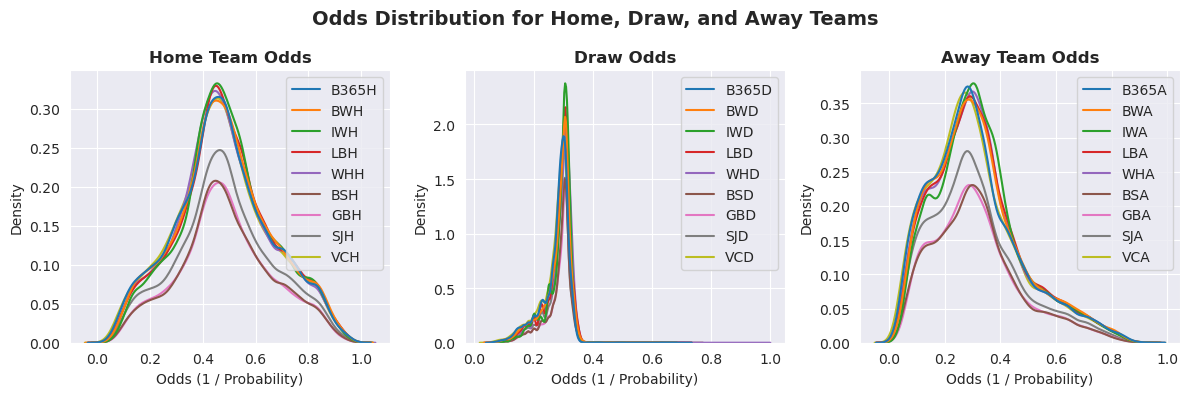

In [140]:
import matplotlib.pyplot as plt

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Add the super-title for the entire figure
fig.suptitle("Odds Distribution for Home, Draw, and Away Teams", fontweight="bold", fontsize=14)

# First subplot
sns.kdeplot(
    data=odds[[ cad for cad in ["B365H", "BWH", "IWH", "LBH", "WHH", "BSH", "GBH", "SJH", "VCH"] ]], 
    fill=False,
    legend=True,
    ax=ax1
)

ax1.set_title("Home Team Odds", fontweight="bold")
ax1.set_xlabel("Odds (1 / Probability)")

# Second subplot
sns.kdeplot(
    data=odds[[ cad for cad in ["B365D", "BWD", "IWD", "LBD", "WHD", "BSD", "GBD", "SJD", "VCD"] ]], 
    fill=False,
    legend=True,
    ax=ax2
)
ax2.set_title("Draw Odds", fontweight="bold")
ax2.set_xlabel("Odds (1 / Probability)")

# Third subplot
sns.kdeplot(
    data=odds[[ cad for cad in ["B365A", "BWA", "IWA", "LBA", "WHA", "BSA", "GBA", "SJA", "VCA"] ]], 
    fill=False,
    legend=True,
    ax=ax3
)
ax3.set_title("Away Team Odds", fontweight="bold")
ax3.set_xlabel("Odds (1 / Probability)")

# Adjust the spacing between the subplots
plt.tight_layout()

# Show the figure
plt.show()

It appears that the different betting houses have odds very near to each other, and these odds are slightly skewed towards home team winning.

**we can assume that the betting groups expect results to favour the home-team overall**

Now, let's explore the following data:

- home_team_goal: Home team goals
- away_team_goal: Away team goals
- home_player_Xx: Position of player x on the X axis
- home_player_Yy: Player y position on the Y axis
- home_player_n: Identifier of player n

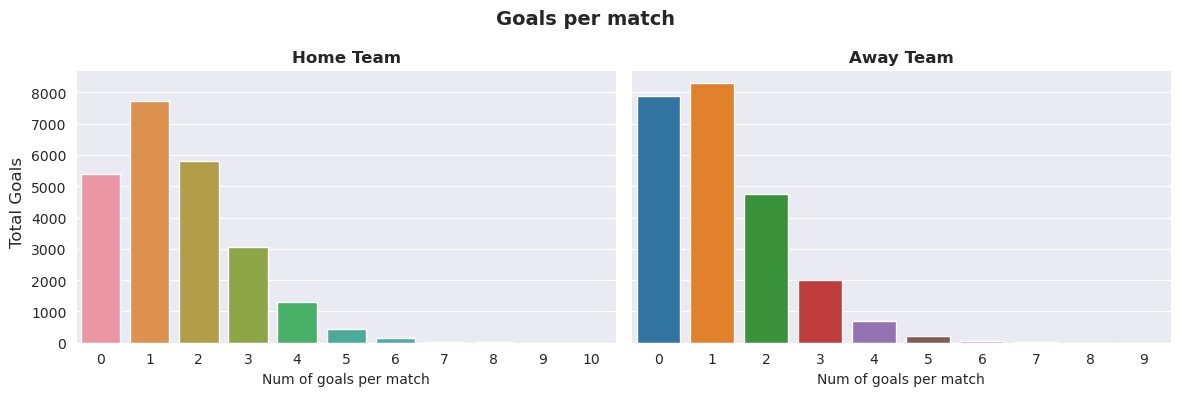

In [141]:
# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.supylabel("Total Goals")
fig.suptitle("Goals per match", fontweight="bold", fontsize=14)
sns.countplot(x="home_team_goal", data=df_match, ax = ax1)
ax1.set_title("Home Team", fontweight="bold")
ax1.set_xlabel("Num of goals per match")
ax1.set_ylabel("")

sns.countplot(x="away_team_goal", data=df_match, ax=ax2)
ax2.set_title("Away Team", fontweight="bold")
ax2.set_xlabel("Num of goals per match")
ax2.set_ylabel("")

# Adjust the spacing between the subplots
plt.tight_layout()
plt.show()

The goals of the local team are usually more favorable than those of the guest team. In this case, a local team is more likely to score goals, at least 1 goal while guest teams have a high probability of not scoring any goal.

**the data indicates that the betting odds placed by the betting groups are in line with the actual real-world results**

In [142]:
# make the values of column goal numberic and equal to the sum of home_team_goal and away_team_goal
df_match["goal"] = df_match["home_team_goal"] + df_match["away_team_goal"]
goals_season = df_match[["season","goal","away_team_goal","home_team_goal"]].groupby(by="season").sum(numeric_only="False")
print(df_match["goal"].head(5), "\n-----------------\n")
goals_season.head(5)

match_api_id
493016    2
493017    3
493018    3
493020    1
493021    3
Name: goal, dtype: int64 
-----------------



,goal,away_team_goal,home_team_goal
season,,,
2008,6119,2600,3519
2009,7940,3357,4583
2010,8126,3471,4655
2011,8198,3446,4752
2012,8409,3700,4709


### We can represent the difference even by time-scale comparison of goals between the home-team total goals vs away-team total goals

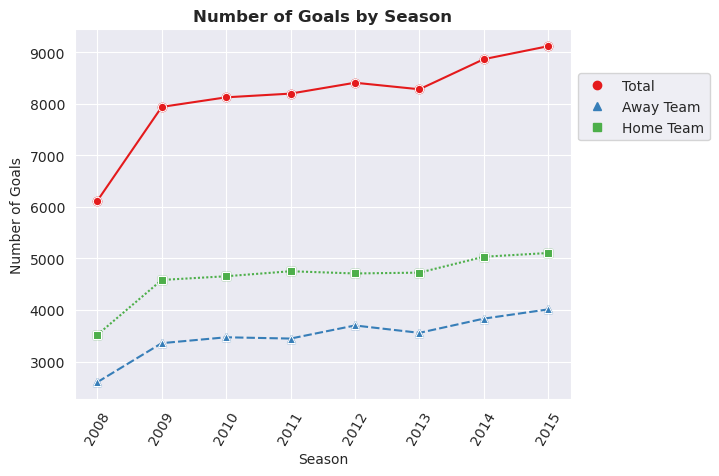

In [143]:
sns.set_palette("Set1")
goals_season.iloc[:,0].plot(style="o")
goals_season.iloc[:,1].plot(style="^")
goals_season.iloc[:,2].plot(style="s")
sns.lineplot(data=goals_season, markers=["o", "^", "s"])
plt.xticks(rotation = 60)
new_labels = ['Total',"Away Team","Home Team"]
plt.title("Number of Goals by Season", fontweight='bold')
plt.ylabel("Number of Goals")
plt.xlabel("Season")
plt.legend(labels=new_labels, bbox_to_anchor=(1, 0.9))
plt.show()

Let's see the evolution of the number of goals over time. In this case, the home teams score more goals than the visitors. We also see that over the years, there is a slight trend towards an increase in the number of goals, but this is perhaps mainly due to this dataset having more recent data than old data.

**The skewness of data towards the left is due to less matches overall. The number of matches have been increasing**

***It is to be noted that the home-team total number of goals has always been more than the away team number of goals***

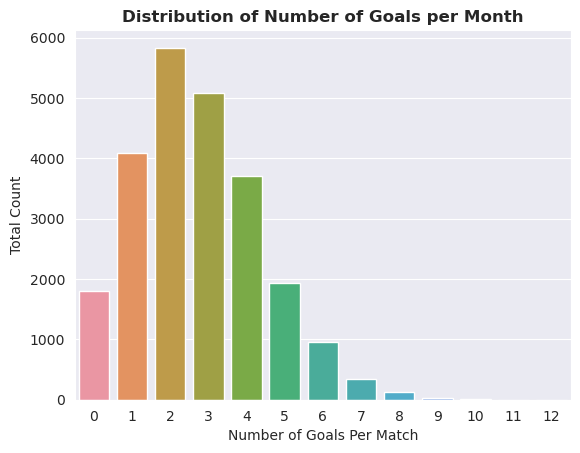

In [144]:
sns.countplot(x="goal", data=df_match)
plt.title("Distribution of Number of Goals per Month", fontweight='bold')
plt.ylabel("Total Count")
plt.xlabel("Number of Goals Per Match")
plt.show()

If we analyze the goals globally, there is a clear normal distribution, in which its center is at the value 2.

The next task to explore is the positions of the players that are determined by two values: X and Y.

To describe this section we have created some functions to visually represent the positions of the players during a match.

### We can draw the players for a particular match on the field-map

by setting the field as background picture and plotting player positions on the axis according to proportion of real ground positions.

In [145]:
def get_player_positions_to_draw(row):
    home = []
    away = []
    for team in ["home", "away"]:   
        for player in range(1,12):
            x_coord = row[team + "_player_X" + str(player)]
            y_coord = row[team + "_player_Y" + str(player)]
            if x_coord == 1 and y_coord == 1: x_coord = 5
            home.append([x_coord, y_coord]) if team == "home" else away.append([x_coord, 24-y_coord])
        
    return (home,away)

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.text as mpl_text
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def player_style(player=[], plot=None, teamType="away"):
    
    thecolor = "white"
    
    style = "x" if teamType == "away" else "+"
    title = "AWAY TEAM" if teamType == "away" else "HOME TEAM"
    coorx = 8 if teamType == "away" else 2
    coory = 23.3 if teamType == "away" else 0.6

    # put title of the plot
    plot.add_artist(
        mpl_text.Text(
            x = coorx,
            y = coory,
            text=title,
            color=thecolor,
            verticalalignment='center',
            horizontalalignment='center',
            fontsize=18
        )
    )

    # plot players on the plot
    for player in player:
        plot.add_artist(
            mpl_text.Text(
                x = player[0],
                y = player[1],
                text=style,
                color=thecolor,
                verticalalignment='center',
                horizontalalignment='center',
                fontsize=18
            )
        )
    

def plot_player_positions(home_player, away_player, venue_country):

    fig = plt.figure(figsize=(7,11), facecolor='white')
    ax = fig.add_subplot(111, facecolor='white')
    ax.set_xlim(0, 10) #Horizontal pitch size 
    ax.set_ylim(0, 24) #Vertical pitch size
    
    field_image = Image.open("/notebooks/images/football-pitch-back.jpeg")
    field_image = field_image.resize((392,600))
    
    flag1 = Image.open(f"/notebooks/flags/{venue_country.lower()}.png")
    flag1 = flag1.resize((16,16))
    
    ax.add_artist( #ax can be added image as artist.
    AnnotationBbox(
        OffsetImage(field_image), 
        (5, 12), 
        frameon=False
    ))
    
    ax.add_artist( #ax can be added image as artist.
        AnnotationBbox(
            OffsetImage(flag1), 
            (9.7, 12), 
            frameon=False
        ))
    ax.add_artist( #ax can be added image as artist.
        AnnotationBbox(
            OffsetImage(flag1), 
            (0.25, 12), 
            frameon=False
        ))

    player_style(home_player,ax, "home")
    player_style(away_player,ax, "away")

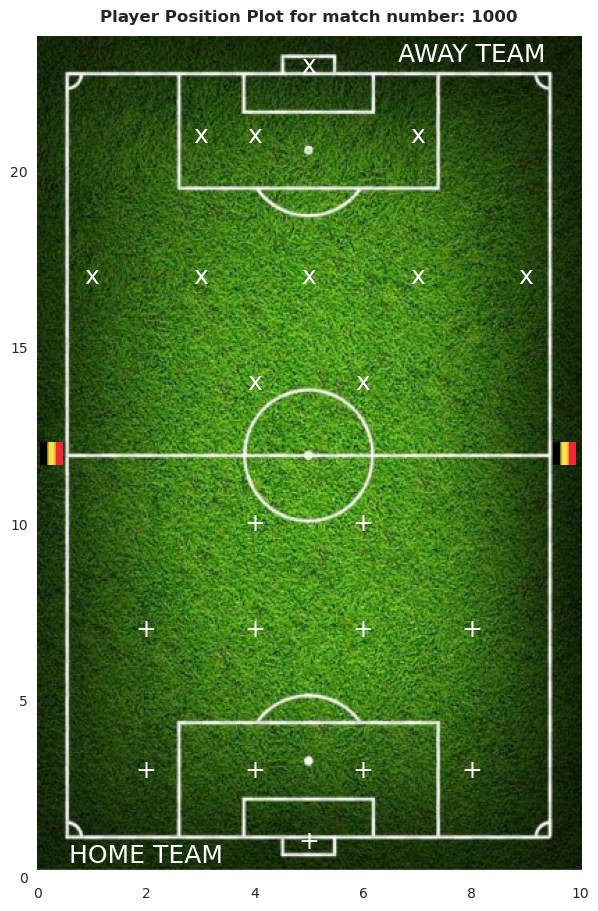

In [147]:
matchNumber = 1000  # the match at this number in the df_match is plotted
home,away = get_player_positions_to_draw(matches_by_country.iloc[matchNumber,:])
venue_country = matches_by_country.iloc[matchNumber,:]["Country"]
plot_player_positions(home,away, venue_country)
theTitle = "Player Position Plot for match number: " + str(matchNumber)
plt.title(theTitle, fontweight='bold')
plt.show()

This way we can show the position chosen by teams in a particular match. We can also see the flag of the hosting country / venue country where the league is held.

### Alternatively, we can also print the team player placement in a string format.

In [148]:
from collections import Counter
from functools import reduce

def get_team_formation(row=None,team=""):
    
    player_y = list()
    
    for i in range(2,12):
        player_y.append(row[team + '_player_Y' + str(i)])
    
    c_player = Counter(player_y)

    formation_list = Counter(sorted(c_player.elements())).values()
    formation = reduce(lambda x,y: str(x) + str(y),formation_list)

    return formation

In [149]:
home_team_positions = get_team_formation(df_match.iloc[1000,:],"home")
away_team_positions = get_team_formation(df_match.iloc[1000,:],"away")
print(f"Home team formation is '{home_team_positions}' whereas away team formation is '{away_team_positions}'")

Home team formation is '442' whereas away team formation is '352'


For instance of match number 1000, we see that the formation of home team is 442, which means how many players exist from the position closest to the goal to the center of the field.

**We then apply this transformation to the entire dataset. Also, we can check if there is any difference in player distribution depending on whether the team is local or not.**

In [150]:
df_match["home_formation"] = df_match.apply(lambda row: get_team_formation(row, "home"),axis=1)
df_match["away_formation"] = df_match.apply(lambda row: get_team_formation(row, "away"),axis=1)
df_match["home_formation"].value_counts()

4231     6381
442      6320
433      4332
451       931
4411      876
352       682
4312      680
4141      627
41212     557
4222      548
41221     371
343       283
4132      245
4321      239
532       186
3421      166
3412      145
3511      123
4123       75
541        69
4213       34
3232       13
3331        7
5311        2
1333        1
163         1
14221       1
Name: home_formation, dtype: int64

In [151]:
df_match["away_formation"].value_counts()

4231      6398
442       5970
433       4320
451       1212
4411       845
4141       705
352        692
4312       612
4222       541
41212      510
41221      365
343        281
4321       262
4132       231
532        191
3421       186
3511       147
541        135
3412       134
4123        89
4213        34
3232        16
3331        13
5311         2
31312        1
33211        1
133111       1
32311        1
Name: away_formation, dtype: int64

**In this case, it seems that there are no significant differences because in both cases the most used distribution is 4231.**

## Add column 'winning_team' that tells which team wins

In this dataset, the winning team is not shown, so we are going to generate a column to reflect the final result of the match: 1 (Home team wins), 2 (Draw) or 3 (Away team wins)

In [152]:
def assign_victory(row):
    
    winner = row["home_team_goal"] - row["away_team_goal"]
    
    if winner == 0:
        return "2"
    elif winner < 0:
        return "3"
    else:
        return "1"

In [153]:
df_match["winning_team"] = df_match.apply(assign_victory, axis = 1)

In [154]:
def getTeamResult(row):
    
    if row["winning_team"] == "1":
        home_team_result = 'Win'
        away_team_result = 'Loss'
    elif row["winning_team"] == "3":
        home_team_result = 'Loss'
        away_team_result = 'Win'
    else:
        home_team_result = 'Draw'
        away_team_result = 'Draw'
    
    return [home_team_result, away_team_result]

### Add columns 'home_team_result' and 'away_team_result' that tells if the particular home or away team wins in the match

In [155]:
df_match[["home_team_result", "away_team_result"]] = df_match.apply(getTeamResult, axis = 1, result_type="expand")

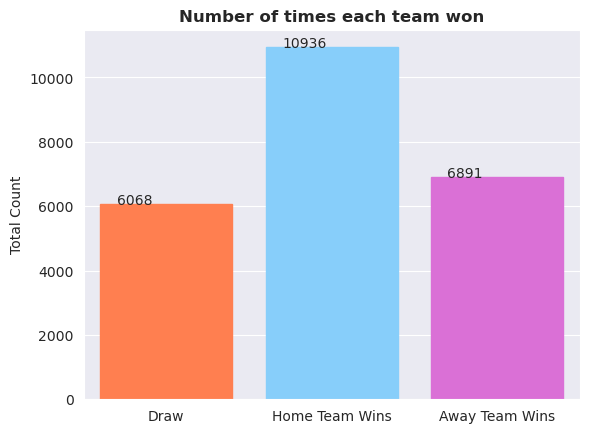

In [156]:
import math
ax = sns.countplot(x="winning_team", data=df_match)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
    if math.ceil(p.get_x()) == 0:
        p.set_color('#ff7f50') # color for Draw
    elif math.ceil(p.get_x()) == 1:
        p.set_color('#87cefa') # color for Home Team Wins
    else:
        p.set_color('#da70d6') # color for Away Team Wins

plt.title("Number of times each team won", fontweight='bold')
plt.ylabel("Total Count")
plt.xlabel("")
plt.xticks(ticks=[0,1,2], labels=['Draw','Home Team Wins','Away Team Wins'])
plt.show()

Observing these results, we highlight that **local teams have a greater tendency to win**.

With these data, we are going to find out if there are relationships between the results of a match and the distribution of the teams.

In [157]:
home_vs_away_df1 = pd.DataFrame()
home_vs_away_df2 = pd.DataFrame()

In [158]:
home_vs_away_df1[["formation", "result"]] = df_match[["home_formation","home_team_result"]].copy()
home_vs_away_df2[["formation", "result"]] = df_match[["away_formation","away_team_result"]].copy()

In [172]:
home_vs_away_df1 = pd.concat([home_vs_away_df1, home_vs_away_df2])
home_vs_away_df1.head()

,formation,result
match_api_id,,
493016,442,Draw
493017,442,Win
493018,442,Win
493020,442,Loss
493021,442,Win


## Null Hypothesis
The 'formation' (initial position of player in the field) of home team does not affect the 'result' of the match.

The chi-square test for independence compares the observed frequencies of two categorical variables in a contingency table to the expected frequencies if the two variables were independent. The test statistic is the chi-squared statistic, which measures the difference between the observed and expected frequencies.

We use the chi2_contingency function from the scipy.stats library to perform the chi-square test for independence. The function takes a contingency table as input and returns the chi-squared statistic, the p-value, the degrees of freedom, and the expected frequencies.

In [174]:
from scipy.stats import chi2_contingency

result_vs_formation = pd.crosstab(home_vs_away_df1['result'], home_vs_away_df1['formation'])
chi2, p, dof, expected = chi2_contingency(result_vs_formation)
print("Chi-squared statistic: ", chi2)
print("p-value: ", p)

Chi-squared statistic:  774.5557129423786
p-value:  8.854981151263343e-125


The chi-squared statistic measures the difference between the observed frequencies of the two categorical variables in the contingency table and the expected frequencies if the two variables were independent. **A high chi-squared statistic indicates that the observed frequencies are significantly different from the expected frequencies, suggesting that the two variables are dependent.**

The p-value is the probability of observing a chi-squared statistic as extreme or more extreme than the one calculated, assuming that the null hypothesis is true. A small p-value (typically less than 0.05) indicates that it is unlikely to observe the observed frequencies if the two variables are independent, and thus provides evidence against the null hypothesis.

In your case, the chi-squared statistic is 774.5557129423786 and the **p-value is** 8.854981151263343e-125, which **is much smaller than 0.05**. This means that there is very strong evidence against the null hypothesis, which is that the formation doesn't affect the result. So we reject the null hypothesis and we can conclude that the formation and the result are dependent.

So in summary, **the formation value does affect the result value**.

In [173]:
result_vs_formation = pd.crosstab(home_vs_away_df1['result'], home_vs_away_df1['formation'])
correlation = result_vs_formation.corr()
print(correlation)

formation    133111      1333     14221       163     31312     32311  \
formation                                                               
133111     1.000000 -0.500000  1.000000 -0.500000 -0.500000 -0.500000   
1333      -0.500000  1.000000 -0.500000  1.000000 -0.500000  1.000000   
14221      1.000000 -0.500000  1.000000 -0.500000 -0.500000 -0.500000   
163       -0.500000  1.000000 -0.500000  1.000000 -0.500000  1.000000   
31312     -0.500000 -0.500000 -0.500000 -0.500000  1.000000 -0.500000   
32311     -0.500000  1.000000 -0.500000  1.000000 -0.500000  1.000000   
3232       0.960769 -0.720577  0.960769 -0.720577 -0.240192 -0.720577   
33211      1.000000 -0.500000  1.000000 -0.500000 -0.500000 -0.500000   
3331       0.075094  0.826033  0.075094  0.826033 -0.901127  0.826033   
3412      -0.565704  0.996984 -0.565704  0.996984 -0.431280  0.996984   
3421      -0.430486  0.996915 -0.430486  0.996915 -0.566429  0.996915   
343       -0.173404  0.939608 -0.173404  0.939608 -

In [160]:
import lxml.etree as ET

def extract_goal_data(goal_xml):
    """Extracts the relevant information about a goal from the XML data."""
    # parse the XML data
    root = ET.fromstring(goal_xml)
    # get the value elements
    values = root.findall('./value')
    # create a list to store the goal data
    goals = []
    # iterate over the value elements
    for value in values:
        # create a dictionary to store the goal data
        goal_data = {}
        # extract the id of the goal
        id_element = value.find('id')
        if id_element is not None:
            goal_data['id'] = id_element.text
        # extract the type of the goal
        type_element = value.find('type')
        if type_element is not None:
            goal_data['type'] = type_element.text
        # extract the team that scored the goal
        team_element = value.find('team')
        if team_element is not None:
            goal_data['team'] = team_element.text
        # extract the first player involved in the goal
        player1_element = value.find('player1')
        if player1_element is not None:
            goal_data['player1'] = player1_element.text
        # extract the second player involved in the goal
        player2_element = value.find('player2')
        if player2_element is not None:
            goal_data['player2'] = player2_element.text
        # extract the subtype of the goal
        subtype_element = value.find('subtype')
        if subtype_element is not None:
            goal_data['subtype'] = subtype_element.text
        # extract the elapsed time of the goal
        elapsed_element = value.find('elapsed')
        if elapsed_element is not None:
            goal_data['elapsed'] = elapsed_element.text
        # add the goal data to the list
        goals.append(goal_data)
    # return the list of goals
    return goals

# apply the extract_goal_data function to each row in the goal column
df_match_light['goals'] = df_match_light['goal'].apply(extract_goal_data)

# print the first five rows of the goals column
print(df_match_light['goals'].head(5))

match_api_id
489042                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         [{'id': '378998', 'type': 'goal', 'team': '10261', 'player1': '37799', 'player2': '38807', 'subtype': 'header', 'elapsed': '22'}, {'id': '379019', 'type': 'goal', 'team': '10260', 'player1': '24148', 'player2': '24154', 'subtype': 'shot', 'elapsed': '24'}]
489043                                                                                                                                                                                                                                                     

In [161]:
import pandas as pd
import re
from collections import Counter

# compile a regular expression to match player values
player_re = re.compile(r'player\d+')

# explode the goals column to create a new row for each goal
df_exploded = df_match_light.explode('goals')

# create an empty Counter to store the goal counts
goal_counts = Counter()

# define a function to extract the players from a goal
def extract_players(goal):
    players = []
    # check if the goal is a dictionary
    if isinstance(goal, dict):
        # iterate over the items in the goal dictionary
        for key, value in goal.items():
            # check if the key matches the player pattern
            if player_re.match(key):
                players.append(value)
    return players

# apply the extract_players function to each row of the goals column
players = df_exploded['goals'].apply(extract_players)

# iterate over the players and update the goal counts
for player_list in players:
    for player in player_list:
        goal_counts[player] += 1

# print the player with the highest goal count
print(goal_counts.most_common(1))

[('30981', 383)]


In [162]:
import pandas as pd

# get the top 5 players by goal count
top_players = goal_counts.most_common(5)

# create a DataFrame from the records in the Counter
highest_scoring_players = pd.DataFrame.from_records(top_players, columns=['player_id', 'total_goals_scored'])

# print the DataFrame
print(highest_scoring_players)

  player_id  total_goals_scored
0     30981                 383
1     30893                 354
2     35724                 257
3     25759                 204
4     37412                 194


In [163]:
df_player.describe()

,birthday,BMI
count,11060.000000,11060.000000
mean,1986.642857,23.061806
std,5.481362,1.316878
min,1967.000000,17.586568
25%,1983.000000,22.170941
50%,1987.000000,23.051962
75%,1991.000000,23.867438
max,1999.000000,30.860445


In [164]:
df_player = football_db["Player"].copy()

In [165]:
df_player['player_api_id'] = df_player['player_api_id'].map(str)
df_player['player_name'] = df_player['player_name'].map(str)

In [166]:
# for each of the values in column player_id in the highest_scoring_players DataFrame
for player_id in highest_scoring_players['player_id']:
    row = df_player[df_player['player_api_id'] == player_id]
    player_name = row['player_name'].values[0]
    # add player_name to player_name in highest_scoring_players where player_id matches current player_id
    highest_scoring_players.loc[highest_scoring_players['player_id'] == player_id, 'player_name'] = player_name

print(highest_scoring_players)

  player_id  total_goals_scored         player_name
0     30981                 383        Lionel Messi
1     30893                 354   Cristiano Ronaldo
2     35724                 257  Zlatan Ibrahimovic
3     25759                 204     Gonzalo Higuain
4     37412                 194       Sergio Aguero


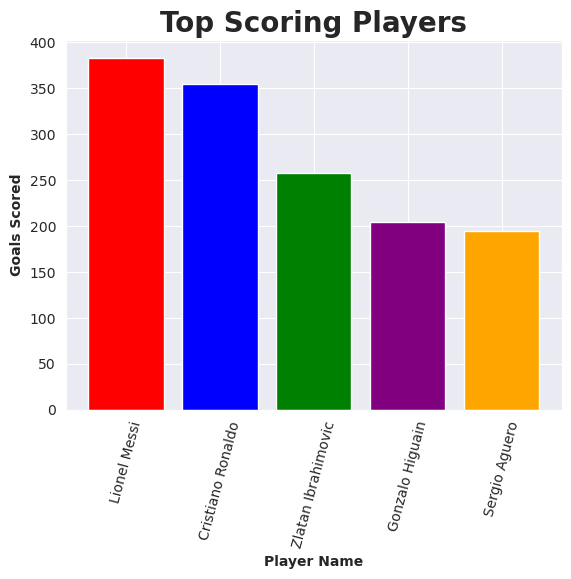

In [167]:
import matplotlib.pyplot as plt

# Sort the dataframe by total_goals_scored in descending order
highest_scoring_players = highest_scoring_players.sort_values(by='total_goals_scored', ascending=False)

# Get the player names and total_goals_scored column as lists
player_names = highest_scoring_players['player_name'].values.tolist()
goals_scored = highest_scoring_players['total_goals_scored'].values.tolist()

# Create a list of x-axis values
x_values = range(len(goals_scored))

colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(len(x_values)):
    plt.bar(x_values[i], goals_scored[i], color=colors[i])

# Add axis labels and a title
plt.xlabel('Player Name', fontweight='bold')
plt.ylabel('Goals Scored', fontweight='bold')
plt.title('Top Scoring Players', fontweight='bold', fontsize=20)

# Label the x-axis with the player names
plt.xticks(x_values, player_names, rotation=75)

# Show the plot
plt.show()